# <font color=#800080>Depression Data Classification Project by Alireza Kia</font>

# First Aspect

## Import Initial Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels import stats, robust
from scipy import stats
from sklearn.preprocessing import LabelEncoder
import warnings
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier
from sklearn.preprocessing import MinMaxScaler, PowerTransformer
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV

warnings.filterwarnings('ignore')

## Import Data

In [2]:
df = pd.read_csv("C:/Users/Pooria/Depression.csv")

## General View of The Data

In [3]:
df.head()

Name  Gender  Age       City Working Professional or Student  \
0    Pooja  Female   37  Ghaziabad            Working Professional   
1  Reyansh    Male   60     Kalyan            Working Professional   
2    Manvi  Female   42     Bhopal            Working Professional   
3     Isha  Female   44      Thane            Working Professional   
4    Aarav    Male   48     Indore            Working Professional   

          Profession  Academic Pressure  Work Pressure  CGPA  \
0            Teacher                NaN            2.0   NaN   
1  Financial Analyst                NaN            4.0   NaN   
2            Teacher                NaN            2.0   NaN   
3            Teacher                NaN            3.0   NaN   
4     UX/UI Designer                NaN            4.0   NaN   

   Study Satisfaction  Job Satisfaction Sleep Duration Dietary Habits Degree  \
0                 NaN               4.0      7-8 hours       Moderate     MA   
1                 NaN               3.0      5-6 hours      Unhealthy  B.Com   
2                 NaN               3.0      5-6 hours       Moderate  M.Com   
3                 NaN               5.0      7-8 hours        Healthy     MD   
4                 NaN               3.0      7-8 hours       Moderate     BE   

  Have you ever had suicidal thoughts ?  Work/Study Hours  Financial Stress  \
0                                    No                 6                 2   
1                                   Yes                 0                 4   
2                                    No                 0                 2   
3                                   Yes                 1                 2   
4                                   Yes                 6                 5   

  Family History of Mental Illness Depression  
0                               No         No  
1                              Yes         No  
2                               No         No  
3                              Yes         No  
4                              Yes         No

In [4]:
df.tail()

Name  Gender  Age       City Working Professional or Student  \
2551  Raghavendra    Male   25  Bangalore            Working Professional   
2552         Pihu  Female   23       Pune            Working Professional   
2553         Sara  Female   24   Srinagar            Working Professional   
2554       Eshita  Female   56  Bangalore            Working Professional   
2555        Kiran    Male   18      Surat                         Student   

            Profession  Academic Pressure  Work Pressure  CGPA  \
2551        Consultant                NaN            1.0   NaN   
2552           Teacher                NaN            3.0   NaN   
2553        HR Manager                NaN            1.0   NaN   
2554  Business Analyst                NaN            2.0   NaN   
2555               NaN                5.0            NaN   6.7   

      Study Satisfaction  Job Satisfaction     Sleep Duration Dietary Habits  \
2551                 NaN               5.0          5-6 hours        Healthy   
2552                 NaN               1.0  Less than 5 hours       Moderate   
2553                 NaN               4.0  Less than 5 hours       Moderate   
2554                 NaN               3.0          7-8 hours        Healthy   
2555                 3.0               NaN  More than 8 hours      Unhealthy   

        Degree Have you ever had suicidal thoughts ?  Work/Study Hours  \
2551       BBA                                   Yes                12   
2552        MA                                   Yes                 8   
2553        BA                                   Yes                 4   
2554       BBA                                    No                 4   
2555  Class 12                                    No                 6   

      Financial Stress Family History of Mental Illness Depression  
2551                 3                              Yes         No  
2552                 3                               No        Yes  
2553                 4                               No         No  
2554                 5                              Yes         No  
2555                 2                              Yes        Yes

In [5]:
df.columns

Index(['Name', 'Gender', 'Age', 'City', 'Working Professional or Student',
       'Profession', 'Academic Pressure', 'Work Pressure', 'CGPA',
       'Study Satisfaction', 'Job Satisfaction', 'Sleep Duration',
       'Dietary Habits', 'Degree', 'Have you ever had suicidal thoughts ?',
       'Work/Study Hours', 'Financial Stress',
       'Family History of Mental Illness', 'Depression'],
      dtype='object')

In [6]:
df.describe()

Age  Academic Pressure  Work Pressure        CGPA  \
count  2556.000000         502.000000    2054.000000  502.000000   
mean     39.043036           3.003984       3.021908    7.567809   
std      12.260596           1.390007       1.417312    1.465367   
min      18.000000           1.000000       1.000000    5.030000   
25%      28.000000           2.000000       2.000000    6.210000   
50%      39.000000           3.000000       3.000000    7.605000   
75%      50.000000           4.000000       4.000000    8.825000   
max      60.000000           5.000000       5.000000   10.000000   

       Study Satisfaction  Job Satisfaction  Work/Study Hours  \
count          502.000000       2054.000000       2556.000000   
mean             3.075697          3.015093          6.023865   
std              1.373490          1.418432          3.771743   
min              1.000000          1.000000          0.000000   
25%              2.000000          2.000000          3.000000   
50%              3.000000          3.000000          6.000000   
75%              4.000000          4.000000          9.000000   
max              5.000000          5.000000         12.000000   

       Financial Stress  
count       2556.000000  
mean           2.968701  
std            1.415527  
min            1.000000  
25%            2.000000  
50%            3.000000  
75%            4.000000  
max            5.000000

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2556 entries, 0 to 2555
Data columns (total 19 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Name                                   2556 non-null   object 
 1   Gender                                 2556 non-null   object 
 2   Age                                    2556 non-null   int64  
 3   City                                   2556 non-null   object 
 4   Working Professional or Student        2556 non-null   object 
 5   Profession                             1883 non-null   object 
 6   Academic Pressure                      502 non-null    float64
 7   Work Pressure                          2054 non-null   float64
 8   CGPA                                   502 non-null    float64
 9   Study Satisfaction                     502 non-null    float64
 10  Job Satisfaction                       2054 non-null   float64
 11  Slee

## Cheking Record of The Features

In [8]:
for col in df.columns:
    print(f"Columns: {col}")
    print(df[col].unique())
    print("-" * 50)

Columns: Name
['Pooja' 'Reyansh' 'Manvi' 'Isha' 'Aarav' 'Sanya' 'Zara' 'Kiran' 'Kush'
 'Damini' 'Rudransh' 'Pratham' 'Raghavendra' 'Siddharth' 'Rahil' 'Charvi'
 'Yuvraj' 'Advait' 'Palak' 'Sanket' 'Ritik' 'Vibha' 'Harshil' 'Tushar'
 'Anushka' 'Rashi' 'Monika' 'Aaradhya' 'Ranveer' 'Leela' 'Suhani' 'Shlok'
 'Rhea' 'Gagan' 'Tanisha' 'Tina' 'Lakshay' 'Vidya' 'Jai' 'Ayush' 'Vivaan'
 'Anaya' 'Mayank' 'Nisha' 'Krishna' 'Trisha' 'Nirvaan' 'Chirag' 'Rishi'
 'Kashish' 'Parth' 'Tanya' 'Neil' 'Ritika' 'Kunal' 'Armaan' 'Prachi'
 'Khushi' 'Riya' 'Janvi' 'Vikram' 'Mihir' 'Anand' 'Rohan' 'Shivam'
 'Harsha' 'Yogesh' 'Ila' 'Nikhil' 'Eshita' 'Nikita' 'Bhavna' 'Manan'
 'Kian' 'Pranav' 'Aarush' 'Abhishek' 'Shreya' 'Tanmay' 'Shiv' 'Prisha'
 'Vedant' 'Vani' 'Vidhi' 'Shaurya' 'Diya' 'Utkarsh' 'Barkha' 'Avni'
 'Vaishnavi' 'Ishaani' 'Navya' 'Deepak' 'Veda' 'Aahana' 'Siddhesh' 'Rupal'
 'Aniket' 'Aditya' 'Dhruv' 'Srishti' 'Anika' 'Jasmine' 'Aditi' 'Darsh'
 'Kriti' 'Mahika' 'Ira' 'Vanya' 'Neha' 'Asha' 'Anjali' 'Jha

# EDA

## Initials For EDA

In [9]:
df_temp = df.copy()

df_temp.drop(["Name", "City", "Profession", "Degree"], axis = 1, inplace = True)

In [10]:
df_temp["Gender"] = df_temp["Gender"].map({"Male": 0, "Female": 1})
df_temp["Working Professional or Student"] = df_temp["Working Professional or Student"].map({"Working Professional": 0, "Student": 1})
df_temp["Sleep Duration"] = df_temp["Sleep Duration"].map({"More than 8 hours": 0, "7-8 hours": 1, "5-6 hours": 2, "less than 5 hours": 3})
df_temp["Dietary Habits"] = df_temp["Dietary Habits"].map({"Unhealthy": 0, "Healthy": 1, "Moderate": 2})
df_temp["Have you ever had suicidal thoughts ?"] = df_temp["Have you ever had suicidal thoughts ?"].map({"No": 0, "Yes": 1})
df_temp["Family History of Mental Illness"] = df_temp["Family History of Mental Illness"].map({"No": 0, "Yes": 1})
df_temp["Depression"] = df_temp["Depression"].map({"No": 0, "Yes": 1})
# df_temp = pd.get_dummies(df_temp, columns=["Gender"], drop_first=True)

In [11]:
df_temp.head(5)

Gender  Age  Working Professional or Student  Academic Pressure  \
0       1   37                                0                NaN   
1       0   60                                0                NaN   
2       1   42                                0                NaN   
3       1   44                                0                NaN   
4       0   48                                0                NaN   

   Work Pressure  CGPA  Study Satisfaction  Job Satisfaction  Sleep Duration  \
0            2.0   NaN                 NaN               4.0             1.0   
1            4.0   NaN                 NaN               3.0             2.0   
2            2.0   NaN                 NaN               3.0             2.0   
3            3.0   NaN                 NaN               5.0             1.0   
4            4.0   NaN                 NaN               3.0             1.0   

   Dietary Habits  Have you ever had suicidal thoughts ?  Work/Study Hours  \
0               2                                      0                 6   
1               0                                      1                 0   
2               2                                      0                 0   
3               1                                      1                 1   
4               2                                      1                 6   

   Financial Stress  Family History of Mental Illness  Depression  
0                 2                                 0           0  
1                 4                                 1           0  
2                 2                                 0           0  
3                 2                                 1           0  
4                 5                                 1           0

In [12]:
df_temp.select_dtypes(exclude='number').columns

Index([], dtype='object')

## First Correlation

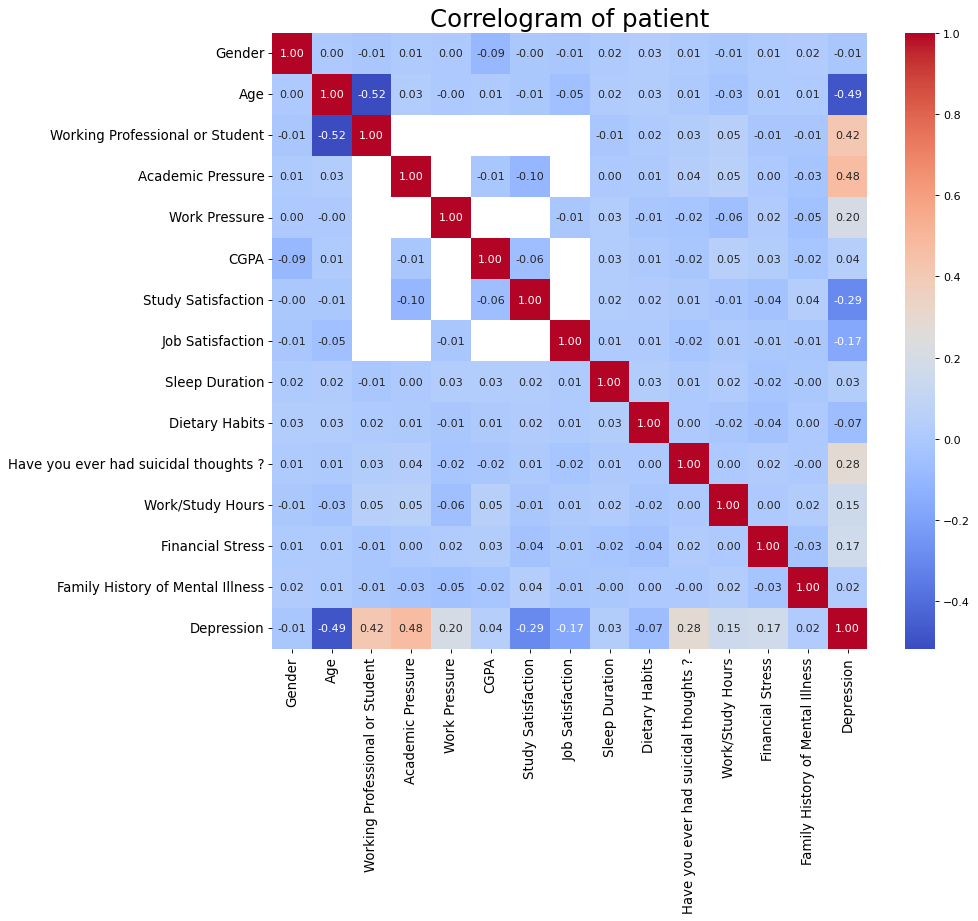

In [13]:
plt.figure(figsize = (12,10), dpi = 80)

corr = df_temp.corr()

sns.heatmap(corr, cmap = "coolwarm",
           annot = True, fmt=".2f")

plt.title("Correlogram of patient", fontsize = 22)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.show()

## Pairplot

<Figure size 2800x2000 with 0 Axes>

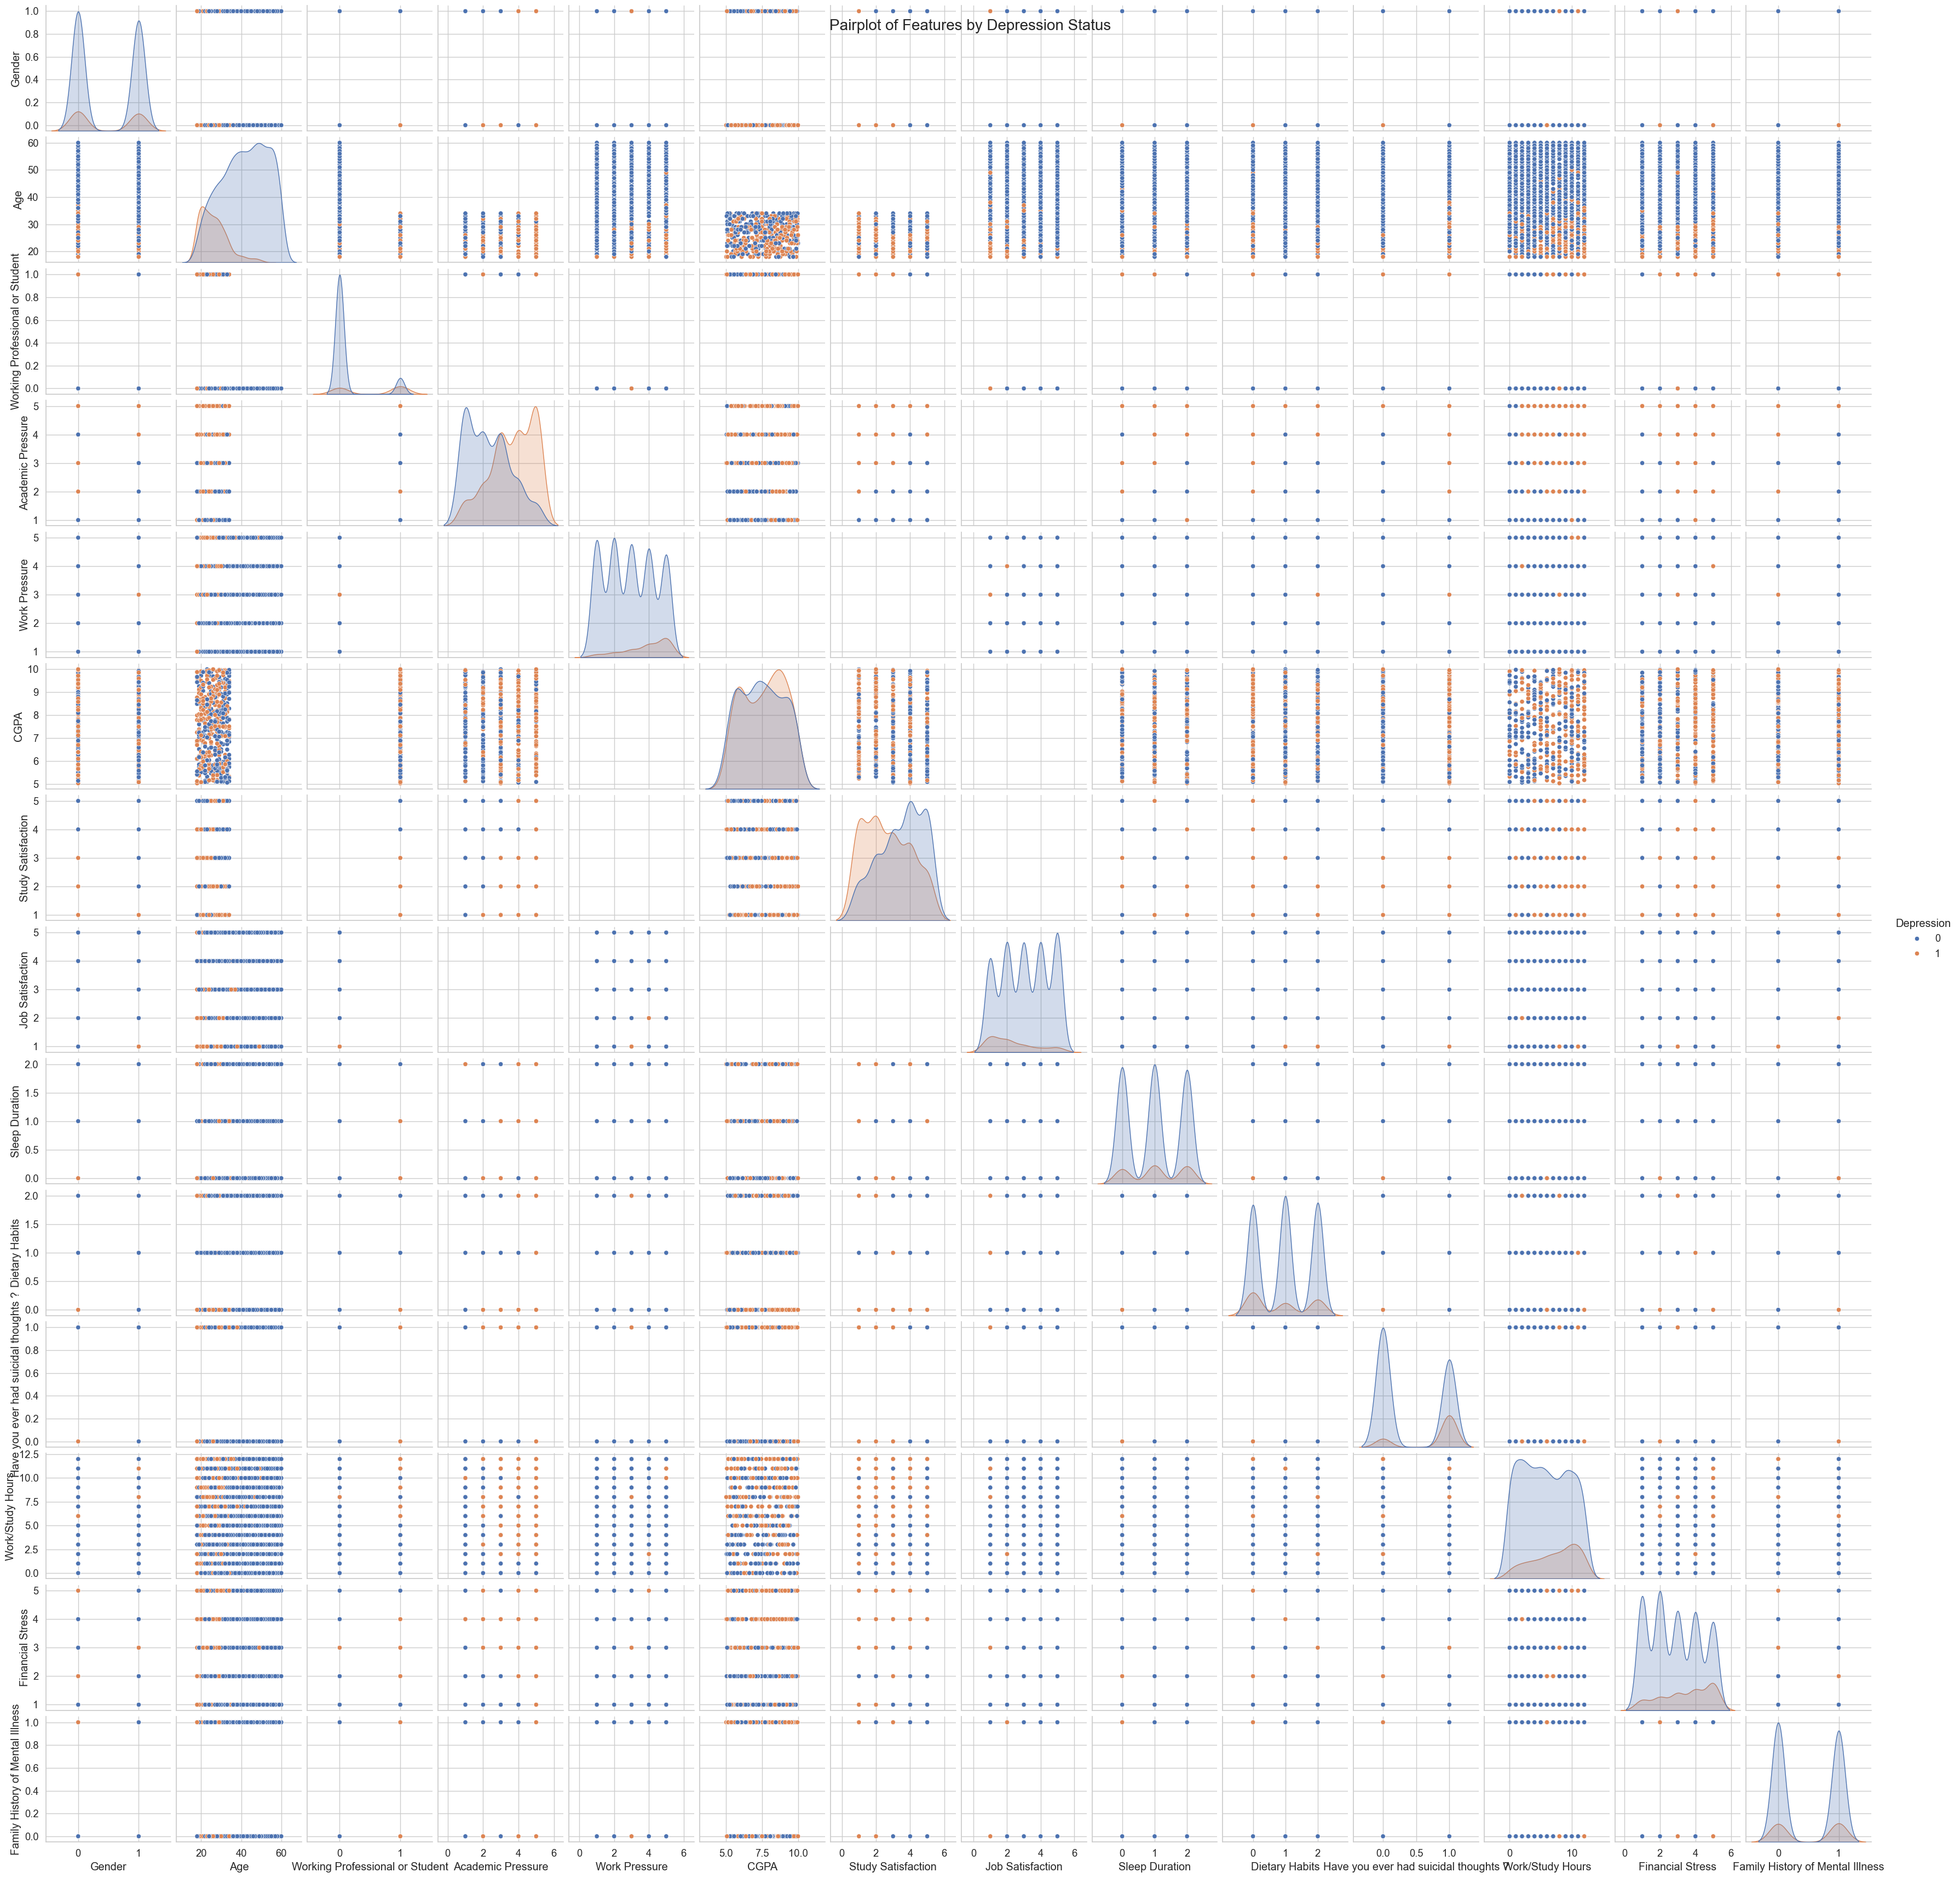

In [14]:
sns.set(style="whitegrid", font_scale=1.2)

plt.figure(figsize=(28, 20))

sns.pairplot(
    df_temp,
    kind = "scatter",
    hue = "Depression",
)

plt.suptitle("Pairplot of Features by Depression Status", fontsize = 20)
plt.show()

## How many people are depressed vs. not depressed?

In [15]:
df_temp["Depression"].value_counts()

Depression
0    2101
1     455
Name: count, dtype: int64

In [16]:
df_temp["Depression"].value_counts(normalize = True)

Depression
0    0.821987
1    0.178013
Name: proportion, dtype: float64

## What is age distribuition / Male vs. Female? / Student vs. Working Professional

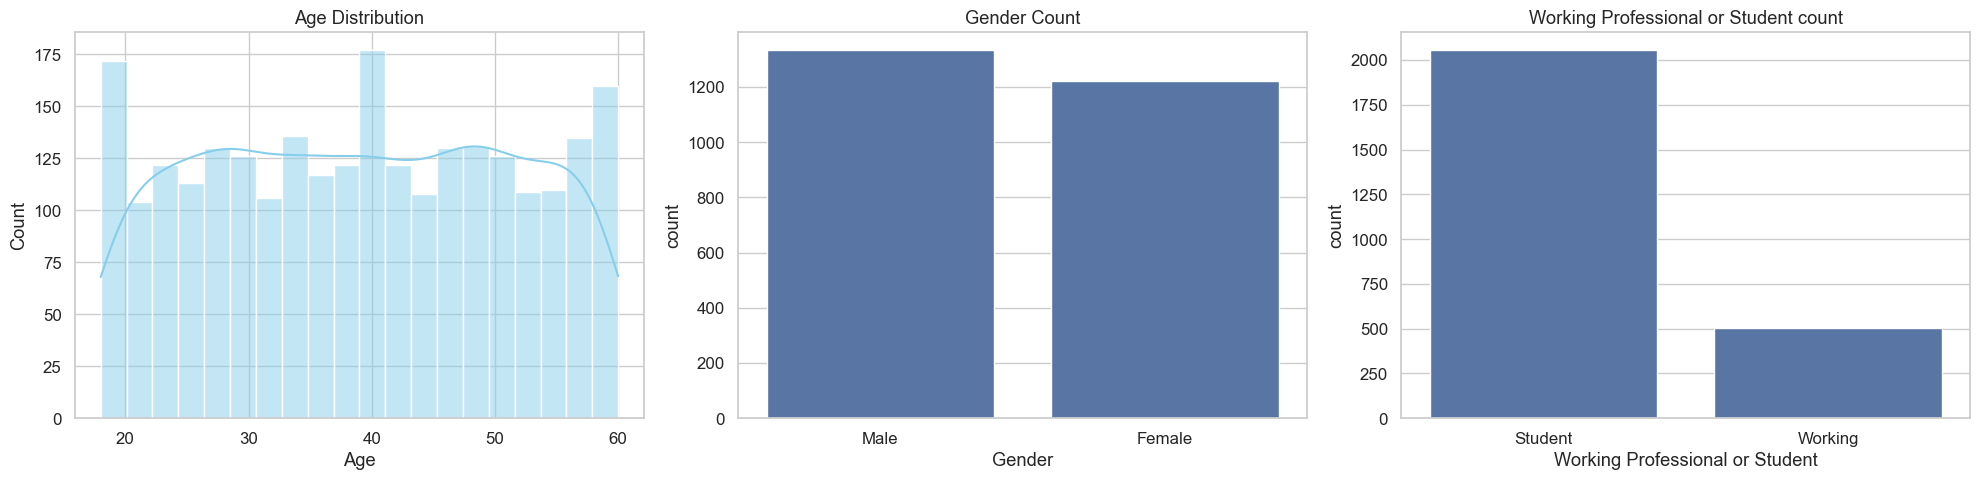

In [17]:
sns.set(style="whitegrid", font_scale = 1.1)

fig, axes = plt.subplots(1, 3, figsize = (20,5))

sns.histplot(df_temp['Age'], bins = 20, kde = True, ax = axes[0], color = 'skyblue')
axes[0].set_title("Age Distribution")

sns.countplot(x = 'Gender', data = df_temp, ax = axes[1])
axes[1].set_title("Gender Count")
axes[1].set_xticks([0,1])
axes[1].set_xticklabels(['Male','Female'])

sns.countplot(x = 'Working Professional or Student', data = df_temp, ax = axes[2])
axes[2].set_title("Working Professional or Student count")
axes[2].set_xticks([0,1])
axes[2].set_xticklabels(['Student','Working'])

plt.tight_layout()
plt.show()

## Numeric Features by Depression

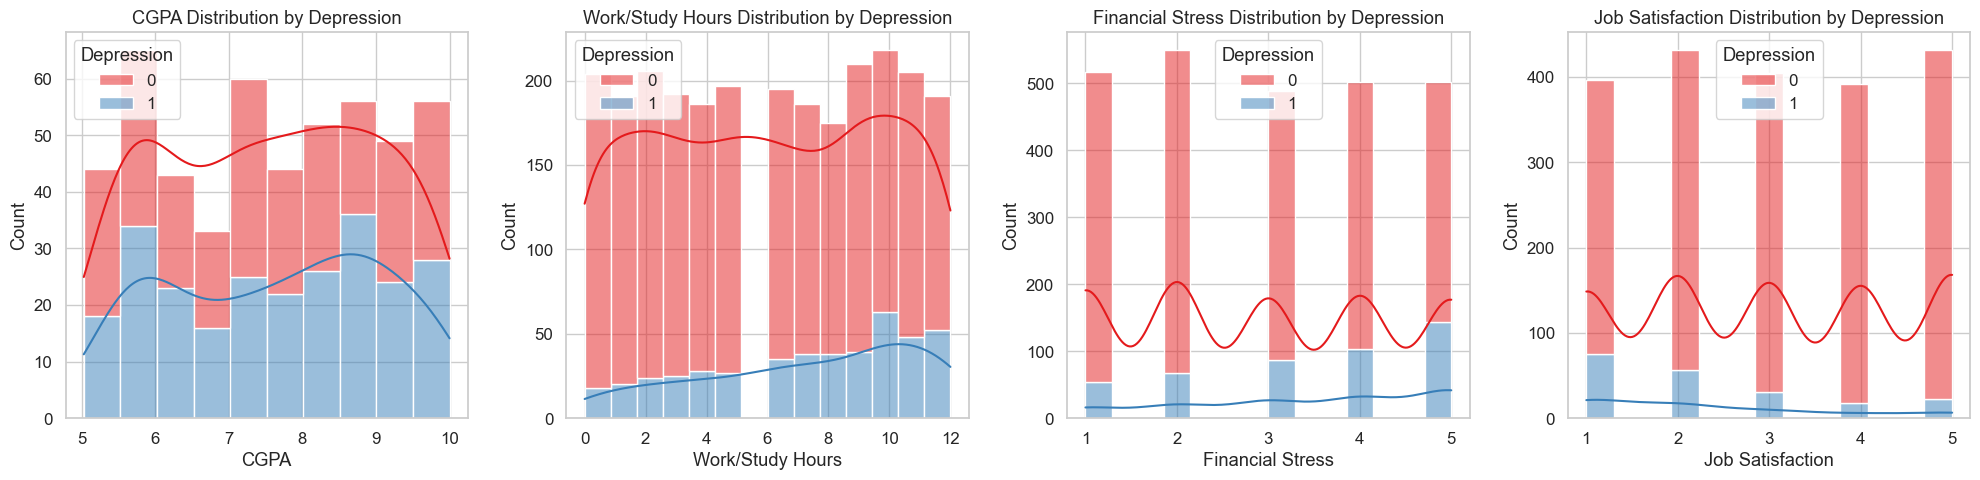

In [18]:
sns.set(style="whitegrid", font_scale=1.1)

numeric_features = ['CGPA', 'Work/Study Hours', 'Financial Stress', 'Job Satisfaction']

fig, axes = plt.subplots(1, 4, figsize=(20,5))

for i, col in enumerate(numeric_features):
    sns.histplot(
        data=df_temp,
        x=col,
        hue='Depression',
        multiple='stack',   
        kde=True,           
        palette='Set1',
        ax=axes[i]
    )
    axes[i].set_title(f'{col} Distribution by Depression')

plt.tight_layout()
plt.show()

## Which columns have missing values? Are they random or systematic?

In [19]:
df_temp.isnull().sum()

Gender                                      0
Age                                         0
Working Professional or Student             0
Academic Pressure                        2054
Work Pressure                             502
CGPA                                     2054
Study Satisfaction                       2054
Job Satisfaction                          502
Sleep Duration                            648
Dietary Habits                              0
Have you ever had suicidal thoughts ?       0
Work/Study Hours                            0
Financial Stress                            0
Family History of Mental Illness            0
Depression                                  0
dtype: int64

<Axes: >

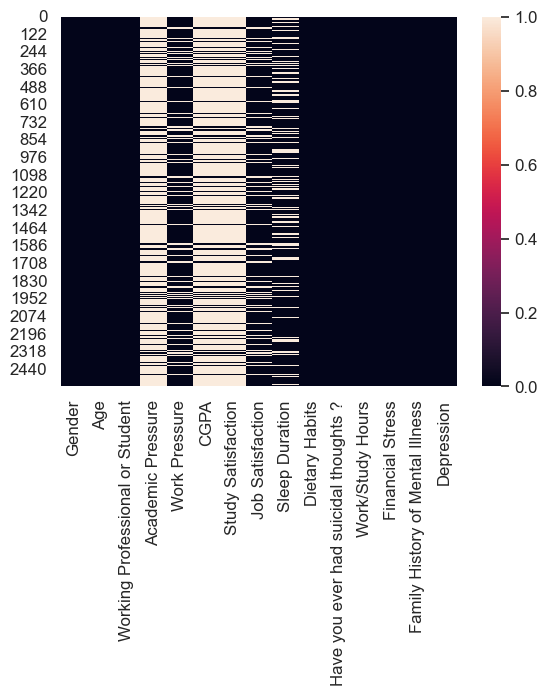

In [20]:
sns.heatmap(df_temp.isnull(), cbar=True)

## Some Important Features by Depression

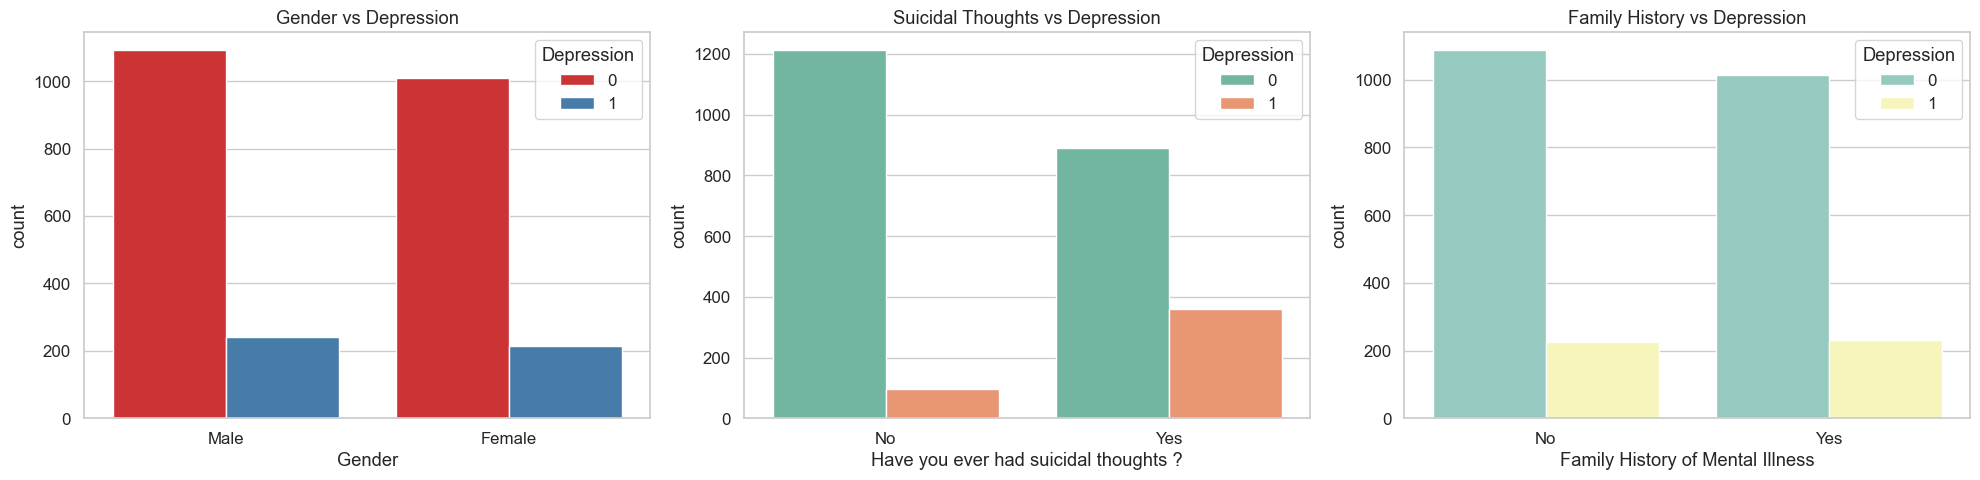

In [21]:
sns.set(style = "whitegrid", font_scale = 1.1)

fig, axes = plt.subplots(1, 3, figsize = (20,5))

sns.countplot(x = 'Gender', hue = 'Depression', data = df_temp, palette = 'Set1', ax = axes[0])
axes[0].set_title("Gender vs Depression")
axes[0].set_xticks([0,1])
axes[0].set_xticklabels(['Male','Female'])

sns.countplot(x='Have you ever had suicidal thoughts ?', hue = 'Depression', data = df_temp, palette = 'Set2', ax = axes[1])
axes[1].set_title("Suicidal Thoughts vs Depression")
axes[1].set_xticks([0,1])
axes[1].set_xticklabels(['No','Yes'])

sns.countplot(x='Family History of Mental Illness', hue = 'Depression', data = df_temp, palette = 'Set3', ax = axes[2])
axes[2].set_title("Family History vs Depression")
axes[2].set_xticks([0,1])
axes[2].set_xticklabels(['No','Yes'])

plt.tight_layout()
plt.show()

## High Correlated Features by Age & Depression

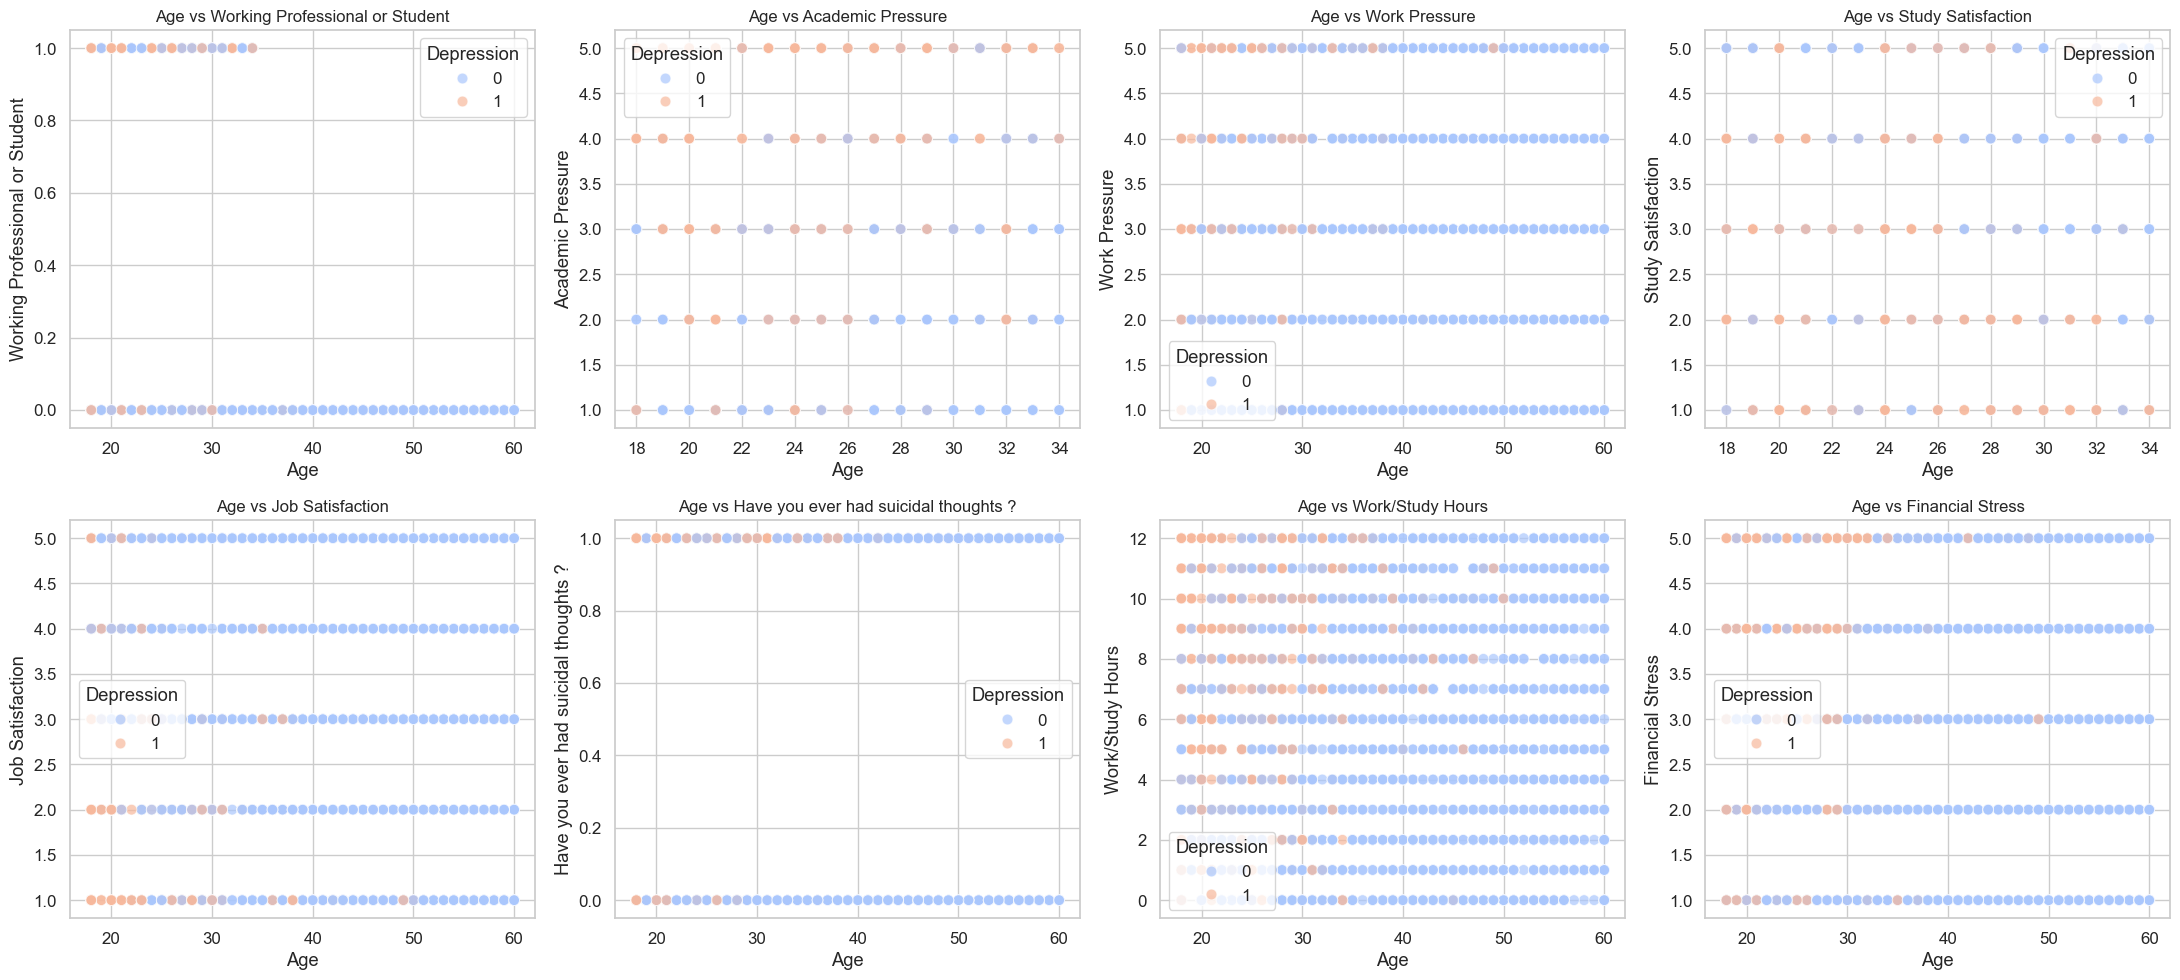

In [22]:
sns.set(style="whitegrid", font_scale=1.1)

cols = [
    "Working Professional or Student",
    "Academic Pressure",
    "Work Pressure",
    "Study Satisfaction",
    "Job Satisfaction",
    "Have you ever had suicidal thoughts ?",
    "Work/Study Hours",
    "Financial Stress"
]

fig, axes = plt.subplots(2, 4, figsize=(22, 10))
axes = axes.ravel()  

for i, col in enumerate(cols):
    sns.scatterplot(
        data=df_temp,
        x="Age",
        y=col,
        hue="Depression",
        palette="coolwarm",
        s=60,
        alpha=0.7,
        ax=axes[i]
    )
    axes[i].set_title(f"Age vs {col}", fontsize=12)
    axes[i].grid(True)

plt.tight_layout()
plt.show()

# Preproccesing

## Data Renaming

In [23]:
df.rename(columns = {"Working Professional or Student" : "Employment",
                     "Have you ever had suicidal thoughts ?" : "Suicidal thoughts",
                     "Work/Study Hours" : "WS hours",
                     "Family History of Mental Illness" : "Family illness"},
                      inplace = True)

In [24]:
df.columns

Index(['Name', 'Gender', 'Age', 'City', 'Employment', 'Profession',
       'Academic Pressure', 'Work Pressure', 'CGPA', 'Study Satisfaction',
       'Job Satisfaction', 'Sleep Duration', 'Dietary Habits', 'Degree',
       'Suicidal thoughts', 'WS hours', 'Financial Stress', 'Family illness',
       'Depression'],
      dtype='object')

## Data Unification

In [25]:
df.drop(["Name", "Family illness", "City"], axis = 1, inplace = True)

columns = ["Sleep Duration", "Dietary Habits", "Gender", "Employment", "Suicidal thoughts", "Depression"] #"Family illness"

for col in columns:
    df[col] = df[col].str.strip().str.lower()

In [26]:
df["Sleep Duration"] = df["Sleep Duration"].map({
    "more than 8 hours": 1,
    "7-8 hours": 2,
    "5-6 hours": 3,
    "less than 5 hours": 4
})

df["Dietary Habits"] = df["Dietary Habits"].map({
    "healthy": 1,
    "moderate": 2,
    "unhealthy": 3
})

df["Gender"] = df["Gender"].map({"male": 0, "female": 1})
df["Employment"] = df["Employment"].map({"working professional": 1, "student": 0})
df["Suicidal thoughts"] = df["Suicidal thoughts"].map({"no": 0, "yes": 1})
# df["Family illness"] = df["Family illness"].map({"no": 0, "yes": 1})
df["Depression"] = df["Depression"].map({"no": 0, "yes": 1})

## Encoding

In [27]:
# for city and profession
for col in ["Profession"]:
    le = LabelEncoder()

    non_null = df[col].dropna()
    le.fit(non_null)
    
    df.loc[df[col].notna(), col] = le.transform(df.loc[df[col].notna(), col])
    
    df[col] = df[col].astype('float')  
    print(f"{col} mapping:")
    print(dict(zip(le.classes_, le.transform(le.classes_))))
    print()

# for degree (label-cluster encoding)
education_levels = {
    "Class 12": 1,
    "BA": 2, "BSc": 2, "B.Com": 2, "B.Ed": 2, "BCA": 2, "B.Arch": 2, 
    "BBA": 2, "BHM": 2, "B.Pharm": 2, "BE": 2, "B.Tech": 2,
    "MA": 3, "MSc": 3, "M.Com": 3, "M.Ed": 3, "MCA": 3,
    "M.Tech": 3, "MBA": 3, "M.Pharm": 3, "ME": 3, "MHM": 3,
    "MD": 4, "LLB": 4, "LLM": 4, "MBBS": 4, "PhD": 4
}
df["Degree"] = df["Degree"].map(education_levels)

# for ws hours
WS_hours = {
    0: 1,
    1: 2, 2: 2, 3: 2, 4: 3, 5: 3, 6: 3, 
    7: 4, 8: 4, 9: 4, 10: 5, 11: 5, 12: 5
}
df["WS hours"] = df["WS hours"].map(WS_hours)


# # for city based on gdp
# city_econ_class = {
#     'Ghaziabad': 2,
#     'Kalyan': 1,
#     'Bhopal': 1,
#     'Thane': 2,
#     'Indore': 3,
#     'Pune': 4,
#     'Bangalore': 4,
#     'Hyderabad': 4,
#     'Srinagar': 1,
#     'Nashik': 2,
#     'Kolkata': 3,
#     'Ahmedabad': 4,
#     'Varanasi': 1,
#     'Chennai': 4,
#     'Jaipur': 3,
#     'Surat': 3,
#     'Vasai-Virar': 2,
#     'Rajkot': 3,
#     'Patna': 1,
#     'Mumbai': 4,
#     'Vadodara': 3,
#     'Lucknow': 2,
#     'Faridabad': 2,
#     'Meerut': 1,
#     'Kanpur': 2,
#     'Visakhapatnam': 2,
#     'Ludhiana': 2,
#     'Nagpur': 3,
#     'Delhi': 4,
#     'Agra': 1
# }
# df["City"] = df["City"].map(city_econ_class)

# for cgpa
df['CGPA'] = df['CGPA'].fillna(0)

def assign_class(grade):
    if grade == 0:
        return 0
    elif 5.00 <= grade <= 5.99:
        return 1
    elif 6.00 <= grade <= 6.99:
        return 2
    elif 7.00 <= grade <= 7.99:
        return 3
    elif 8.00 <= grade <= 8.99:
        return 4
    elif 9.00 <= grade <= 10.00:
        return 5
    else:
        return None

df['CGPA'] = df['CGPA'].apply(assign_class)

Profession mapping:
{'Accountant': 0, 'Architect': 1, 'Business Analyst': 2, 'Chef': 3, 'Chemist': 4, 'Civil Engineer': 5, 'Consultant': 6, 'Content Writer': 7, 'Customer Support': 8, 'Data Scientist': 9, 'Digital Marketer': 10, 'Doctor': 11, 'Educational Consultant': 12, 'Electrician': 13, 'Entrepreneur': 14, 'Finanancial Analyst': 15, 'Financial Analyst': 16, 'Graphic Designer': 17, 'HR Manager': 18, 'Investment Banker': 19, 'Judge': 20, 'Lawyer': 21, 'Manager': 22, 'Marketing Manager': 23, 'Mechanical Engineer': 24, 'Pharmacist': 25, 'Pilot': 26, 'Plumber': 27, 'Research Analyst': 28, 'Researcher': 29, 'Sales Executive': 30, 'Software Engineer': 31, 'Teacher': 32, 'Travel Consultant': 33, 'UX/UI Designer': 34}



## Data Type Transformation 

In [28]:
num_cols = df.select_dtypes(include=['int64', 'int32', 'float64']).columns

for col in num_cols:
    if col != "CGPA": 
        if df[col].dtype == 'float64':
            df[col] = df[col].round().astype('Int16')
        else:
            df[col] = df[col].astype('Int16')

print(df.dtypes)

Gender                Int16
Age                   Int16
Employment            Int16
Profession            Int16
Academic Pressure     Int16
Work Pressure         Int16
CGPA                  int64
Study Satisfaction    Int16
Job Satisfaction      Int16
Sleep Duration        Int16
Dietary Habits        Int16
Degree                Int16
Suicidal thoughts     Int16
WS hours              Int16
Financial Stress      Int16
Depression            Int16
dtype: object


## Outlier Handling

### Boxplot

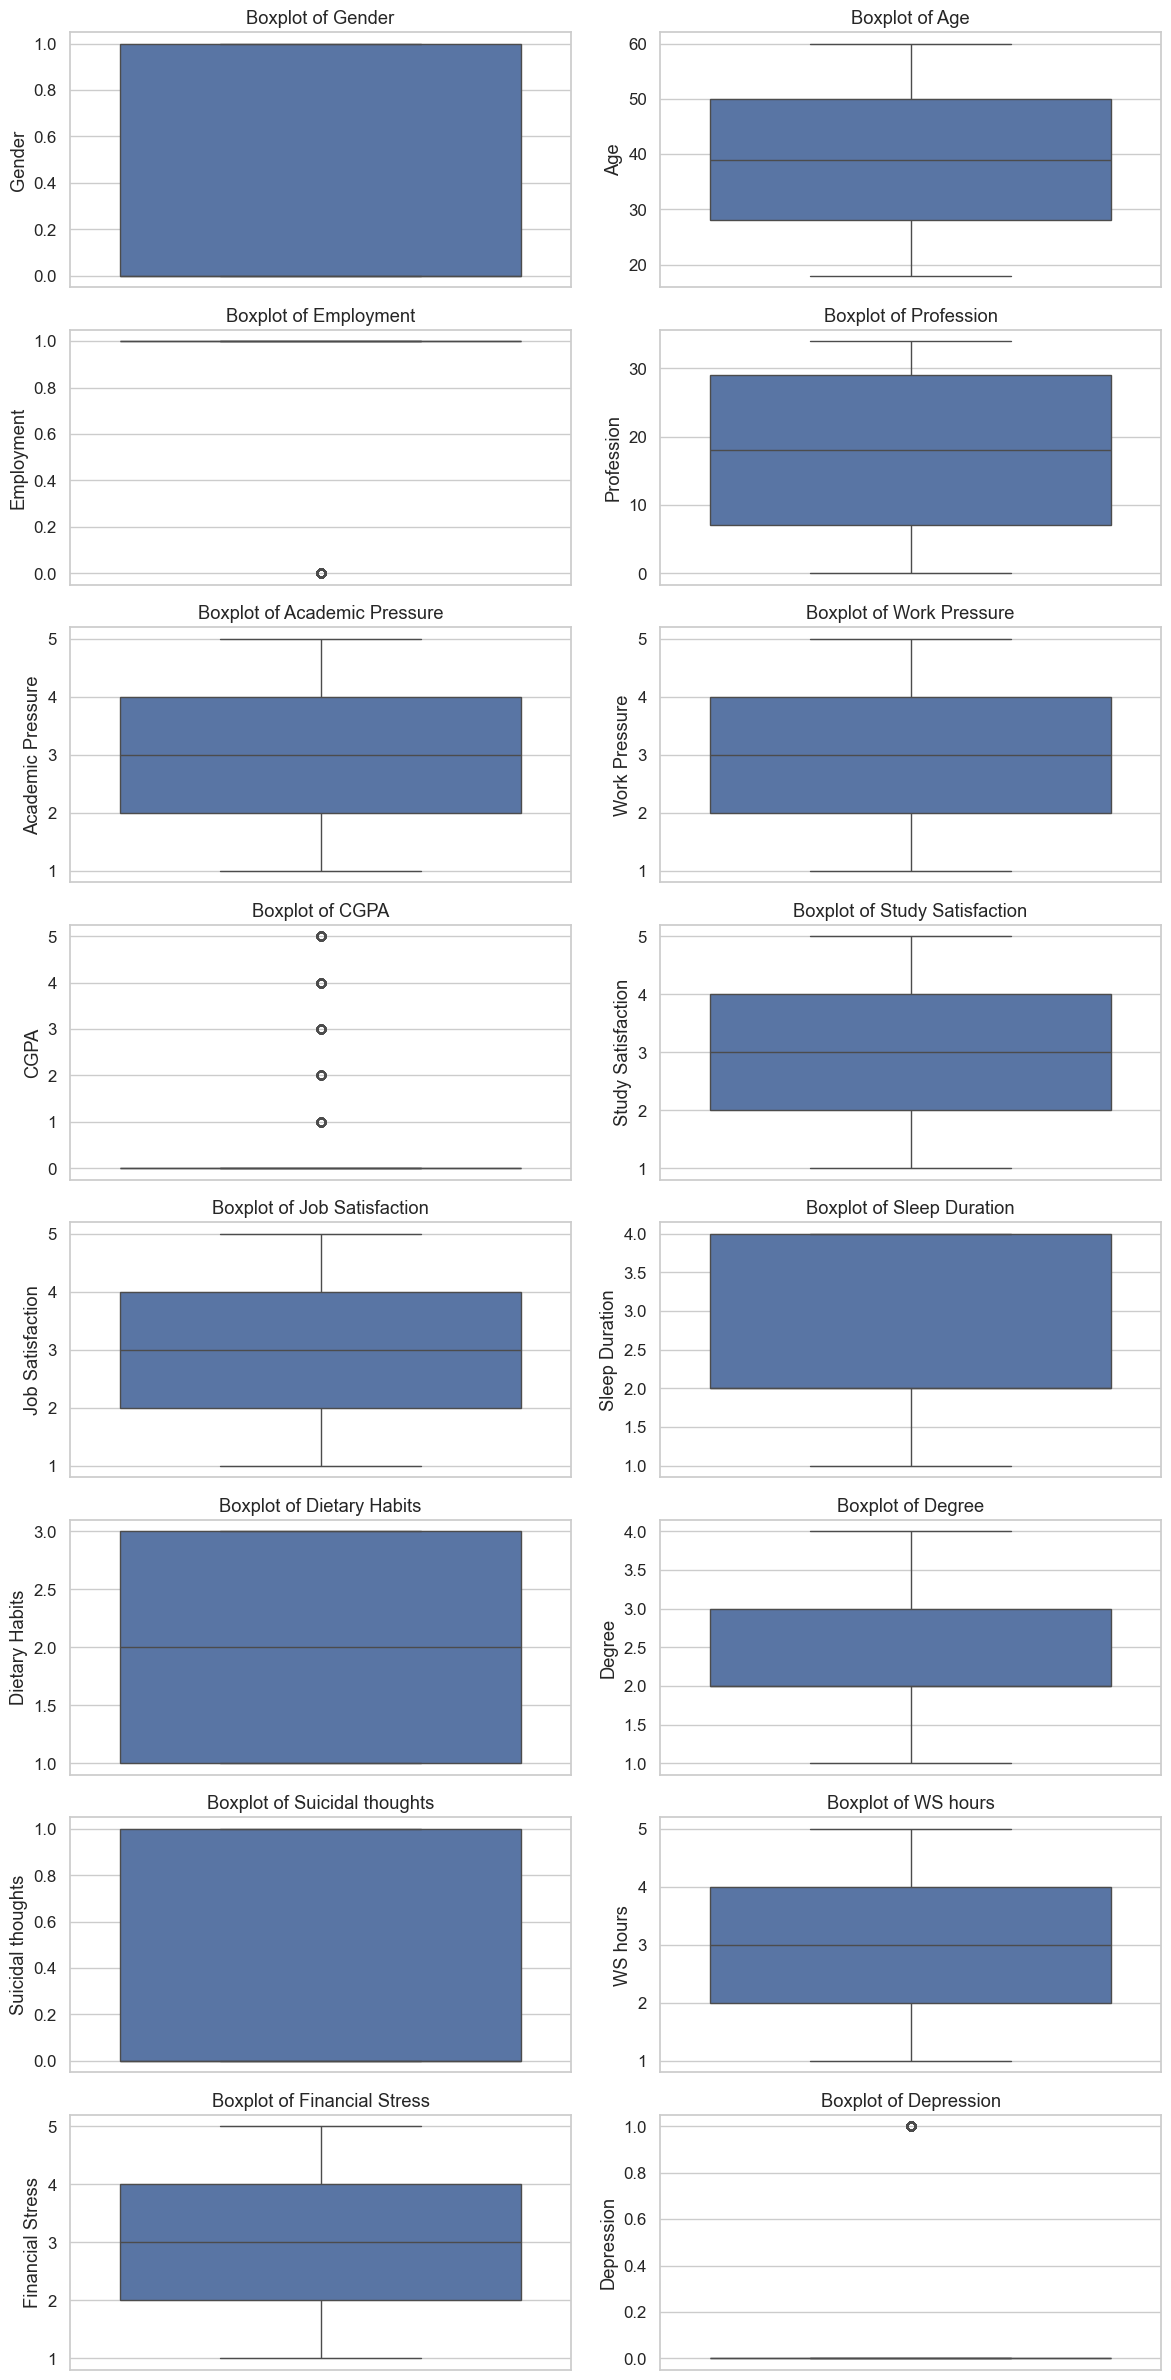

In [29]:
columns = df.select_dtypes(include='number').columns

n_cols = 2
n_rows = (len(columns) + n_cols - 1) // n_cols  

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, n_rows * 3))

axes = np.ravel(axes)

for i, col in enumerate(columns):
    sns.boxplot(y=df[col], ax=axes[i])
    axes[i].set_title(f"Boxplot of {col}")

for j in range(i+1, len(axes)):
    axes[j].axis("off")

plt.tight_layout()
plt.show()

### Histogram plot

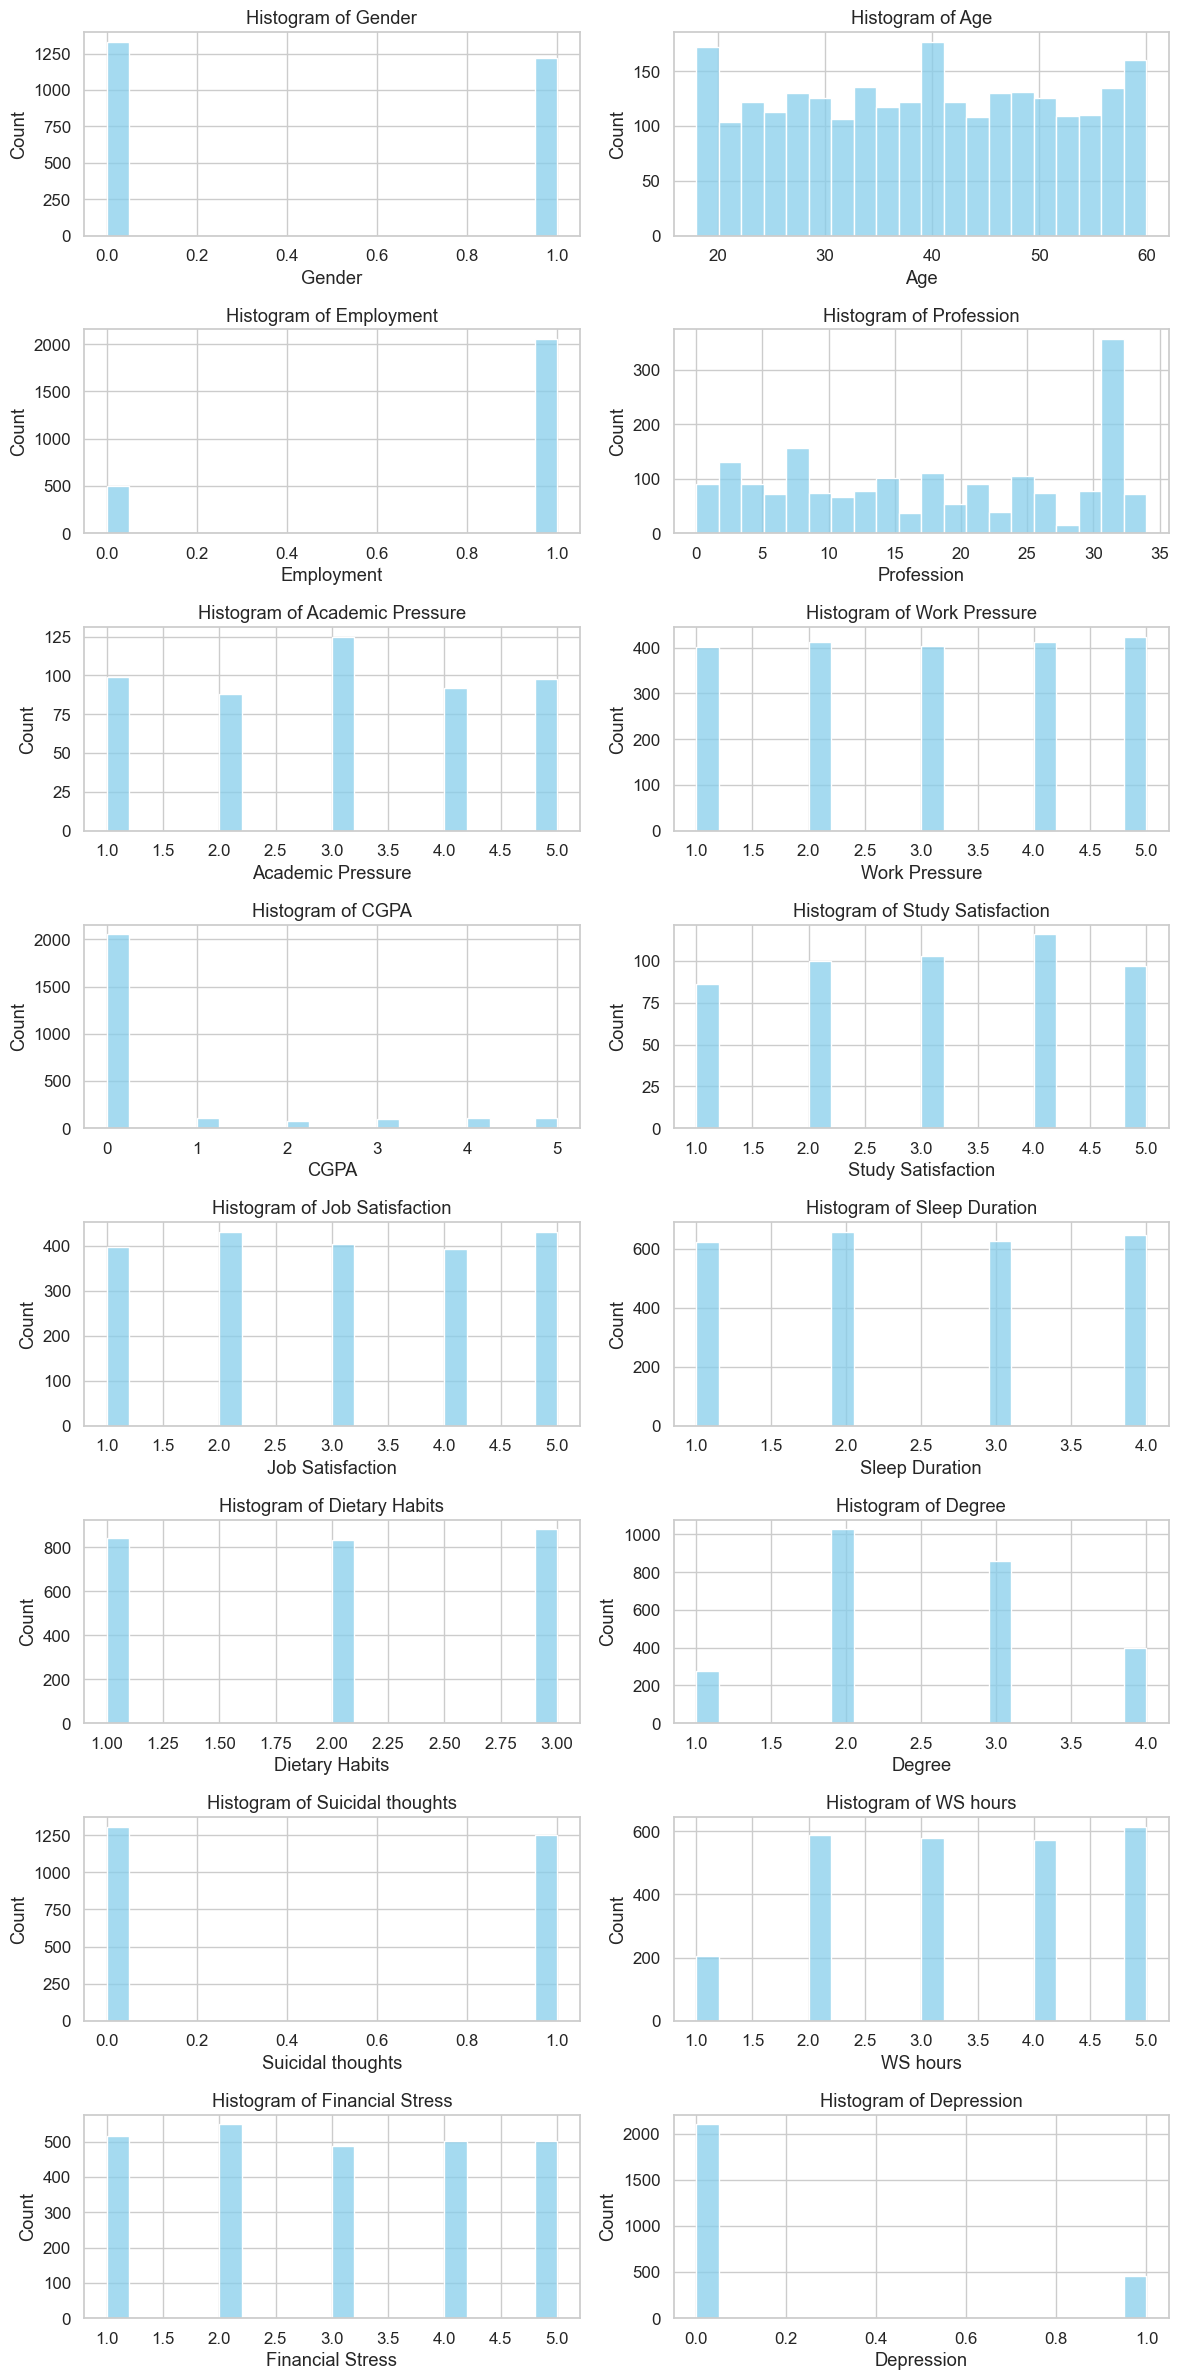

In [30]:
columns = df.select_dtypes(include='number').columns  

n_cols = 2
n_rows = (len(columns) + n_cols - 1) // n_cols  

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, n_rows * 3))
axes = np.ravel(axes)  

for i, col in enumerate(columns):
    sns.histplot(df[col], bins=20, ax=axes[i], color="skyblue")
    axes[i].set_title(f"Histogram of {col}")

for j in range(len(columns), len(axes)):
    axes[j].axis("off")

plt.tight_layout()
plt.show()

### Distribution Plot

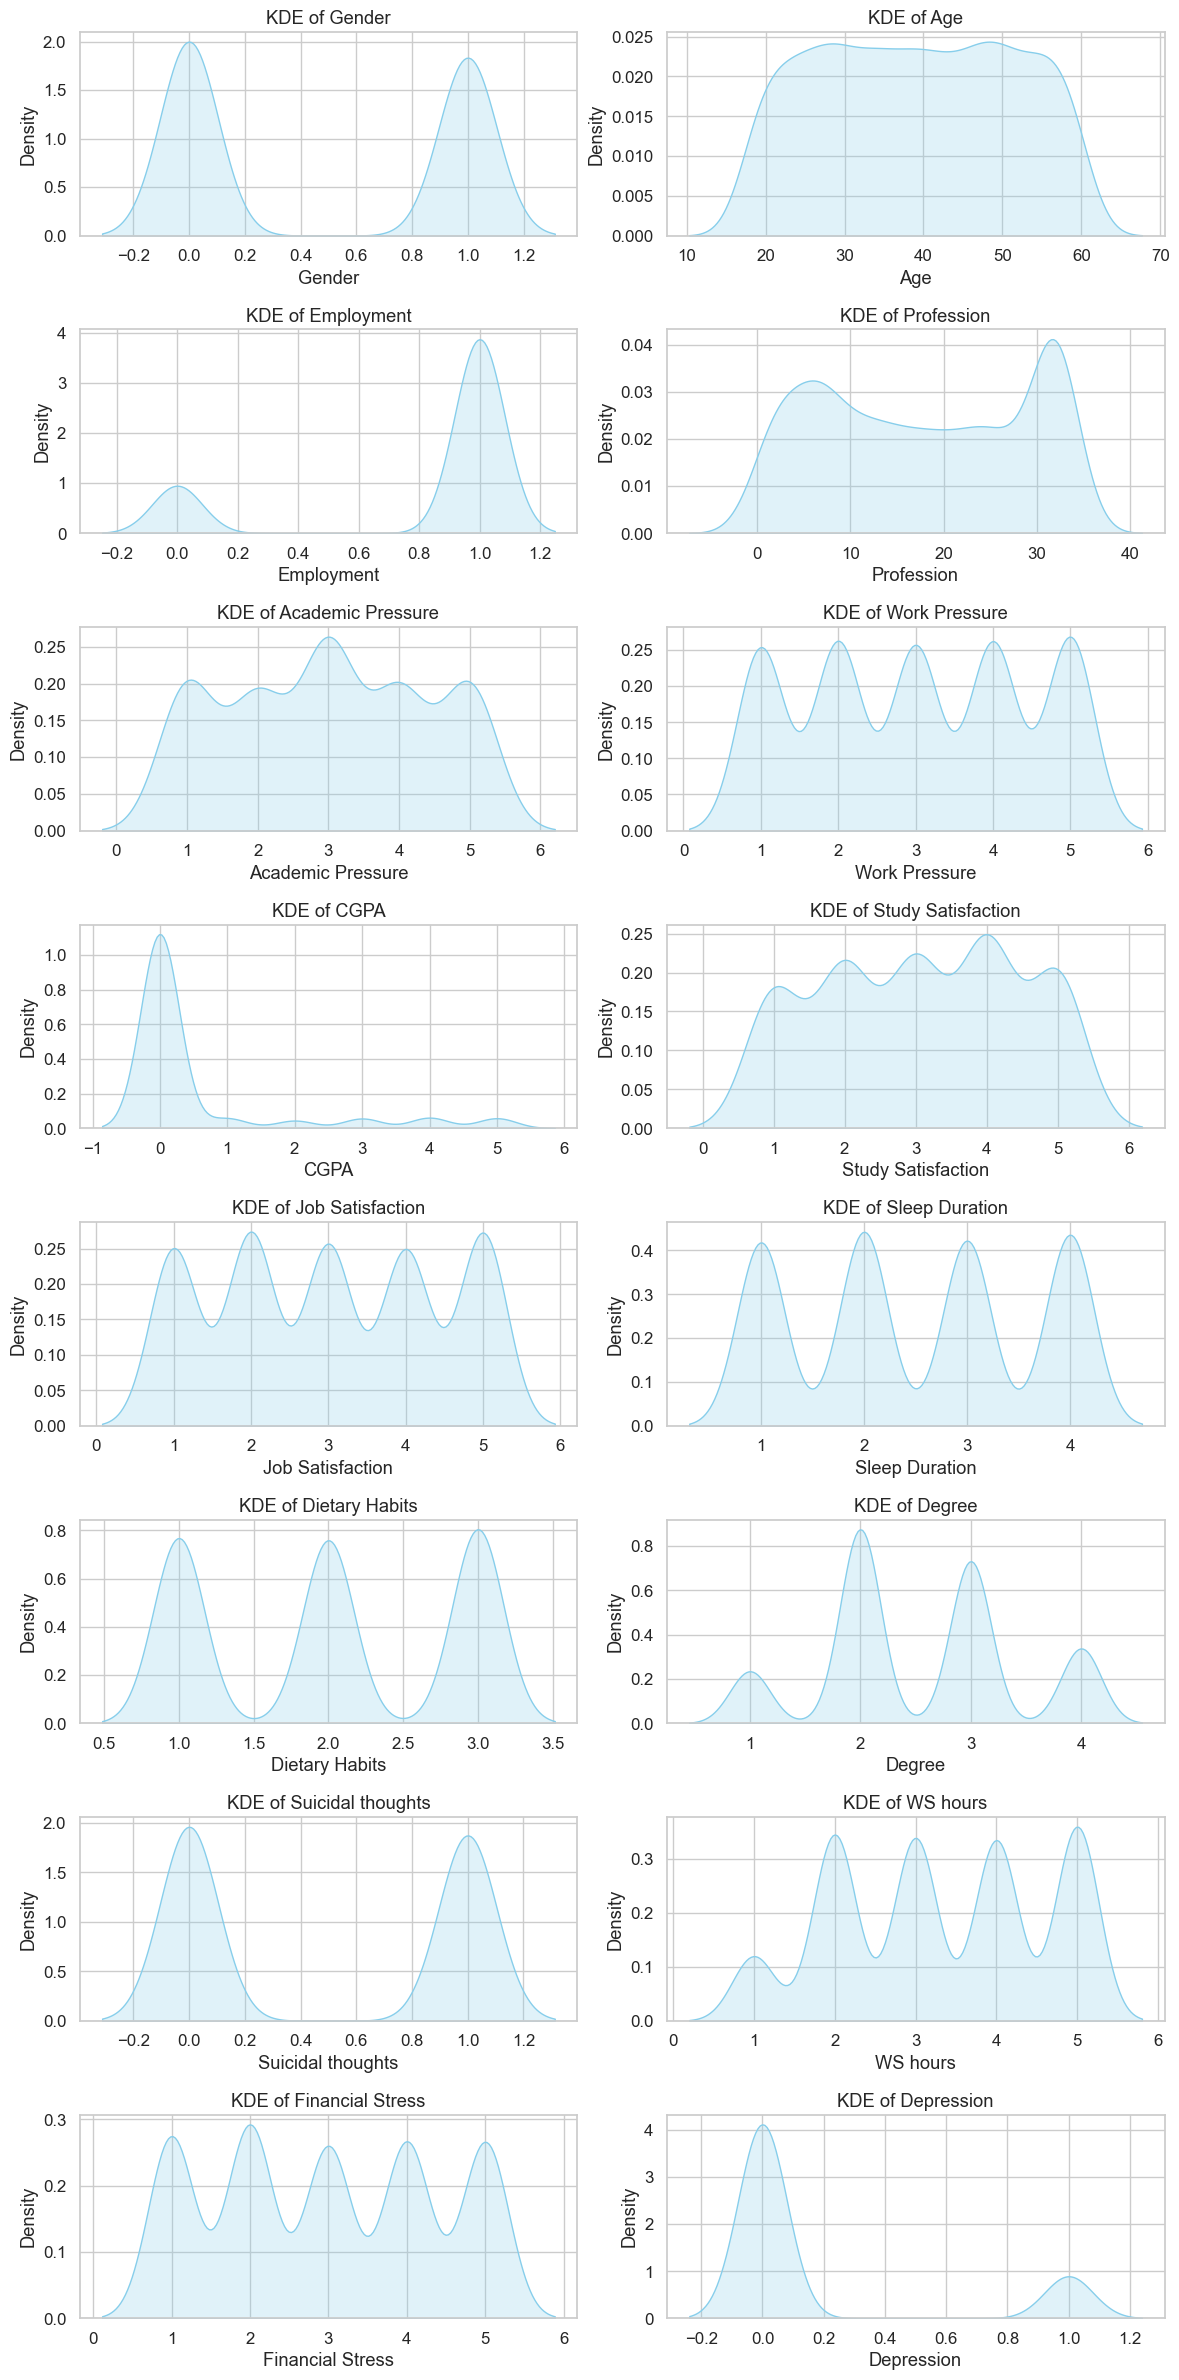

In [31]:
columns = df.select_dtypes(include='number').columns  

n_cols = 2
n_rows = (len(columns) + n_cols - 1) // n_cols  

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, n_rows * 3))
axes = np.ravel(axes)  

for i, col in enumerate(columns):
    sns.kdeplot(df[col], ax=axes[i], fill=True, color="skyblue")  
    axes[i].set_title(f"KDE of {col}")
    axes[i].set_xlabel(col)

for j in range(len(columns), len(axes)):
    axes[j].axis("off")

plt.tight_layout()
plt.show()

### Check Anomaly Data

In [32]:
for col in df.columns:
    print(f"Columns: {col}")
    print(sorted([x for x in df[col].unique() if pd.notna(x)]))
    print("-" * 50)

Columns: Gender
[0, 1]
--------------------------------------------------
Columns: Age
[18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60]
--------------------------------------------------
Columns: Employment
[0, 1]
--------------------------------------------------
Columns: Profession
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34]
--------------------------------------------------
Columns: Academic Pressure
[1, 2, 3, 4, 5]
--------------------------------------------------
Columns: Work Pressure
[1, 2, 3, 4, 5]
--------------------------------------------------
Columns: CGPA
[0, 1, 2, 3, 4, 5]
--------------------------------------------------
Columns: Study Satisfaction
[1, 2, 3, 4, 5]
--------------------------------------------------
Columns: Job Satisfaction
[1, 2, 3, 4, 5]
----

## Missing Handling

In [33]:
df.isnull().sum()

Gender                   0
Age                      0
Employment               0
Profession             673
Academic Pressure     2054
Work Pressure          502
CGPA                     0
Study Satisfaction    2054
Job Satisfaction       502
Sleep Duration           0
Dietary Habits           0
Degree                   0
Suicidal thoughts        0
WS hours                 0
Financial Stress         0
Depression               0
dtype: int64

* We have got two distinct groups:

* Students → have academic variables (Academic Pressure, CGPA, Study Satisfaction) We need to separate the dataset 

* Working Professionals → have job variables (Work Pressure, Job Satisfaction) We need to separate the dataset 

* So the missing values are by design (not real “missing” data)

In [34]:
missing_degree = df[df['Degree'].isna()]

print([missing_degree])

[Empty DataFrame
Columns: [Gender, Age, Employment, Profession, Academic Pressure, Work Pressure, CGPA, Study Satisfaction, Job Satisfaction, Sleep Duration, Dietary Habits, Degree, Suicidal thoughts, WS hours, Financial Stress, Depression]
Index: []]


In [35]:
students_with_profession = df[(df["Employment"] == 0) & (df["Profession"].notna())]
print("Number of students who have a profession:", len(students_with_profession))

Number of students who have a profession: 0


In [36]:
df["Profession"] = df["Profession"].astype("object")
df.loc[(df["Employment"] == 0) & (df["Profession"].isna()), "Profession"] = 35

df.loc[df["Employment"] == 1, ["Academic Pressure", "Study Satisfaction"]] = 0 #cgpa for this type convert into 0 in encoding section

df.loc[df["Employment"] == 0, ["Work Pressure", "Job Satisfaction"]] = 0

* Still have 171 missing in Profession feature, it likely means those people are working professionals but didn’t specify their profession

In [37]:
df.loc[df["Profession"].isna(), ["Employment", "Degree"]].value_counts()

Employment  Degree
1           1         171
Name: count, dtype: int64

In [38]:
missing_profession = df[df["Profession"].isna()]
print("Total missing profession rows:", len(missing_profession))

display(missing_profession)

Total missing profession rows: 171


Gender  Age  Employment Profession  Academic Pressure  Work Pressure  \
10         0   21           1       <NA>                  0              2   
14         0   18           1       <NA>                  0              3   
27         1   51           1       <NA>                  0              5   
48         0   30           1       <NA>                  0              3   
66         1   20           1       <NA>                  0              3   
...      ...  ...         ...        ...                ...            ...   
2488       1   19           1       <NA>                  0              2   
2498       0   18           1       <NA>                  0              5   
2516       1   56           1       <NA>                  0              2   
2520       0   23           1       <NA>                  0              1   
2531       1   18           1       <NA>                  0              4   

      CGPA  Study Satisfaction  Job Satisfaction  Sleep Duration  \
10       0                   0                 5               4   
14       0                   0                 1               1   
27       0                   0                 5               2   
48       0                   0                 5               1   
66       0                   0                 5               4   
...    ...                 ...               ...             ...   
2488     0                   0                 3               2   
2498     0                   0                 4               1   
2516     0                   0                 3               4   
2520     0                   0                 5               3   
2531     0                   0                 2               4   

      Dietary Habits  Degree  Suicidal thoughts  WS hours  Financial Stress  \
10                 2       1                  0         3                 1   
14                 3       1                  1         4                 3   
27                 1       1                  1         4                 5   
48                 2       1                  0         2                 2   
66                 2       1                  1         4                 5   
...              ...     ...                ...       ...               ...   
2488               3       1                  0         5                 3   
2498               1       1                  0         3                 2   
2516               2       1                  1         4                 4   
2520               2       1                  0         5                 3   
2531               2       1                  0         2                 4   

      Depression  
10             0  
14             1  
27             0  
48             0  
66             1  
...          ...  
2488           0  
2498           0  
2516           0  
2520           0  
2531           1  

[171 rows x 16 columns]

* We got 171 real missing data 

In [39]:
import random
np.random.seed(369)
random.seed(369)

df["Profession"] = df["Profession"].astype("Int16")
probabilities = df.loc[df['Profession'] != 35, 'Profession'].value_counts(normalize=True)
missing_idx = df[df['Profession'].isna()].index

df.loc[missing_idx, 'Profession'] = np.random.choice(
    probabilities.index, size=len(missing_idx), p=probabilities.values
)

In [40]:
df.isnull().sum()

Gender                0
Age                   0
Employment            0
Profession            0
Academic Pressure     0
Work Pressure         0
CGPA                  0
Study Satisfaction    0
Job Satisfaction      0
Sleep Duration        0
Dietary Habits        0
Degree                0
Suicidal thoughts     0
WS hours              0
Financial Stress      0
Depression            0
dtype: int64

## Feature Engineering

* breif summary of feature engineering
* "City", "Name", "Familty illnes" got removed from dataset cause of no correlation with target
* "WS hours", "CGPA", "Degree" got cluster label encoded for simplicity

## Duplicate Data

In [41]:
df_nodup = df[df.duplicated(keep = False)]
df_nodup

Empty DataFrame
Columns: [Gender, Age, Employment, Profession, Academic Pressure, Work Pressure, CGPA, Study Satisfaction, Job Satisfaction, Sleep Duration, Dietary Habits, Degree, Suicidal thoughts, WS hours, Financial Stress, Depression]
Index: []

In [42]:
df = df.drop_duplicates(keep='first')

## pair plot before modeling

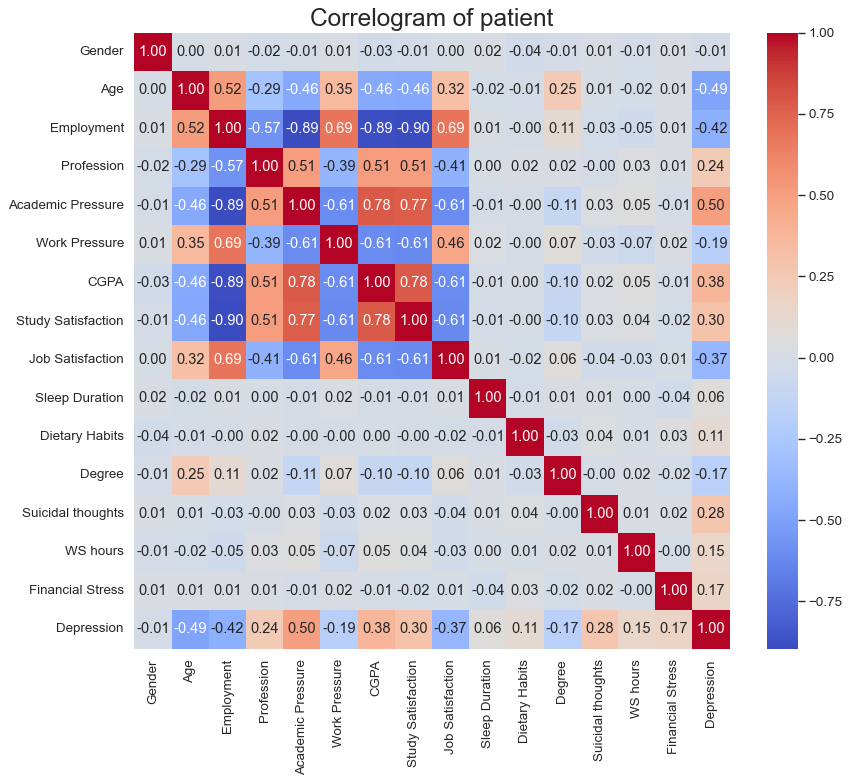

In [43]:
plt.figure(figsize = (12,10), dpi = 80)

corr = df.corr()

sns.heatmap(corr, cmap = "coolwarm",
           annot = True, fmt=".2f")

plt.title("Correlogram of patient", fontsize = 22)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.show()

In [44]:
df

Gender  Age  Employment  Profession  Academic Pressure  Work Pressure  \
0          1   37           1          32                  0              2   
1          0   60           1          16                  0              4   
2          1   42           1          32                  0              2   
3          1   44           1          32                  0              3   
4          0   48           1          34                  0              4   
...      ...  ...         ...         ...                ...            ...   
2551       0   25           1           6                  0              1   
2552       1   23           1          32                  0              3   
2553       1   24           1          18                  0              1   
2554       1   56           1           2                  0              2   
2555       0   18           0          35                  5              0   

      CGPA  Study Satisfaction  Job Satisfaction  Sleep Duration  \
0        0                   0                 4               2   
1        0                   0                 3               3   
2        0                   0                 3               3   
3        0                   0                 5               2   
4        0                   0                 3               2   
...    ...                 ...               ...             ...   
2551     0                   0                 5               3   
2552     0                   0                 1               4   
2553     0                   0                 4               4   
2554     0                   0                 3               2   
2555     2                   3                 0               1   

      Dietary Habits  Degree  Suicidal thoughts  WS hours  Financial Stress  \
0                  2       3                  0         3                 2   
1                  3       2                  1         1                 4   
2                  2       3                  0         1                 2   
3                  1       4                  1         2                 2   
4                  2       2                  1         3                 5   
...              ...     ...                ...       ...               ...   
2551               1       2                  1         5                 3   
2552               2       3                  1         4                 3   
2553               2       2                  1         3                 4   
2554               1       2                  0         3                 5   
2555               3       1                  0         3                 2   

      Depression  
0              0  
1              0  
2              0  
3              0  
4              0  
...          ...  
2551           0  
2552           1  
2553           0  
2554           0  
2555           1  

[2556 rows x 16 columns]

## One-hot dummy

In [45]:
df_encoded = pd.get_dummies(
    df,
    columns=["Profession"],
    drop_first=True,
    dtype=int
)

df = df_encoded

# Modeling - Optimizing - Evaluation

In [46]:
X = df.drop("Depression", axis=1)
y = df["Depression"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.2, random_state = 369, stratify = y)

## Random forest

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best Parameters: {'criterion': 'entropy', 'max_depth': 9, 'max_features': None, 'max_leaf_nodes': 80, 'min_samples_leaf': 5, 'min_samples_split': 7, 'n_estimators': 500}
Best CV Score: 0.956547619047619
Accuracy on Test Data: 0.92578125
              precision    recall  f1-score   support

         0.0       0.98      0.93      0.95       421
         1.0       0.73      0.92      0.82        91

    accuracy                           0.93       512
   macro avg       0.86      0.92      0.88       512
weighted avg       0.94      0.93      0.93       512

Train Score: 0.9735812133072407
Test Score: 0.92578125


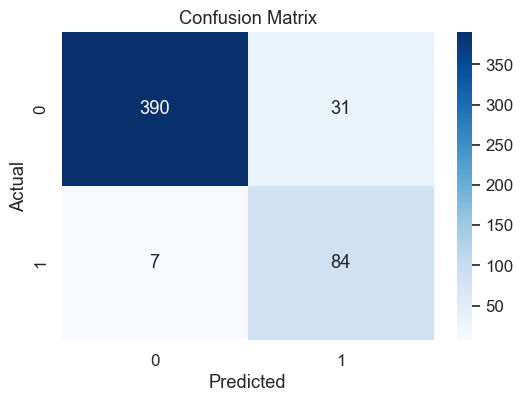

In [47]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split

ros = RandomOverSampler(random_state = 369)
X_train_balanced, y_train_balanced = ros.fit_resample(X_train, y_train)

RF_model = RandomForestClassifier(random_state = 369, class_weight = 'balanced')

param_grid_rf = {
    'n_estimators': [500],
    'criterion': ['entropy'],
    'max_depth': [9],
    'min_samples_split': [7, 6],
    'min_samples_leaf': [5, 6],
    'max_features': ['sqrt', None],
    'max_leaf_nodes': [80]
}

grid_search_rf = GridSearchCV(
    estimator = RF_model,
    param_grid = param_grid_rf,
    cv = 5,
    scoring = 'accuracy',
    n_jobs = -1,
    verbose = 1
)

grid_search_rf.fit(X_train_balanced, y_train_balanced)

print("Best Parameters:", grid_search_rf.best_params_)
print("Best CV Score:", grid_search_rf.best_score_)

y_pred = grid_search_rf.predict(X_test)

print("Accuracy on Test Data:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

train_acc_rf = grid_search_rf.score(X_train, y_train)
test_acc_rf = grid_search_rf.score(X_test, y_test)

print("Train Score:", train_acc_rf)
print("Test Score:", test_acc_rf)

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (6, 4))
sns.heatmap(cm, annot = True, fmt = "d", cmap = "Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

## KNN

Fitting 5 folds for each of 88 candidates, totalling 440 fits
Best Parameters: {'algorithm': 'auto', 'leaf_size': 10, 'metric': 'manhattan', 'n_neighbors': 17, 'p': 1, 'weights': 'uniform'}
Best CV Accuracy: 0.8967735749556546
Accuracy on Test Data: 0.892578125
              precision    recall  f1-score   support

         0.0       0.90      0.97      0.94       421
         1.0       0.80      0.53      0.64        91

    accuracy                           0.89       512
   macro avg       0.85      0.75      0.79       512
weighted avg       0.89      0.89      0.88       512

Train Accuracy: 0.9001956947162426
Test Accuracy: 0.892578125


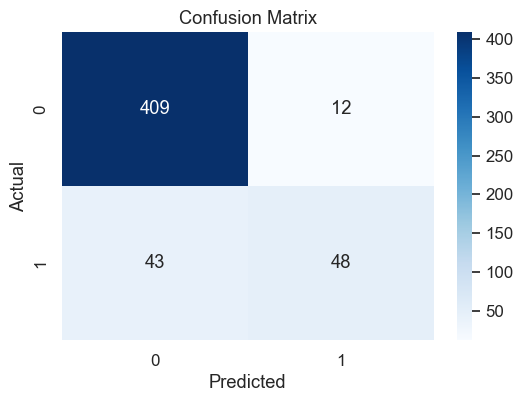

In [48]:
from sklearn.utils import resample
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

minority_class = df[df['Depression'] == 1]
majority_class = df[df['Depression'] == 0]

oversampled_minority = minority_class.sample(len(majority_class), replace = True, random_state = 369)
balanced_df = pd.concat([majority_class, oversampled_minority])

X_balanced = balanced_df.drop("Depression", axis = 1)
y_balanced = balanced_df["Depression"]

X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(
    X_balanced, y_balanced, test_size=0.2, random_state=369, stratify=y_balanced
)

float_features = [
    'Age', 'Academic Pressure', 'Work Pressure', 'CGPA',
    'Study Satisfaction', 'Job Satisfaction', 'Sleep Duration',
    'Dietary Habits', 'Degree', 'WS hours', 'Financial Stress'
]

sc = MinMaxScaler()
X_train[float_features] = sc.fit_transform(X_train[float_features])
X_test[float_features] = sc.transform(X_test[float_features])

KnnModel = KNeighborsClassifier()

param_grid_knn = {
    'n_neighbors': list(range(10, 21)),
    'weights': ['uniform'],
    'metric': ['euclidean', 'manhattan'],
    'p': [1, 2],
    'algorithm': ['auto'],
    'leaf_size': [10, 20]
}

grid_search_knn = GridSearchCV(
    estimator = KnnModel,
    param_grid = param_grid_knn,
    cv = 5,
    scoring = 'accuracy',
    n_jobs = -1,
    verbose = 1
)

grid_search_knn.fit(X_train, y_train)

print("Best Parameters:", grid_search_knn.best_params_)
print("Best CV Accuracy:", grid_search_knn.best_score_)

y_pred = grid_search_knn.predict(X_test)

print("Accuracy on Test Data:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

train_acc_knn = grid_search_knn.score(X_train, y_train)
test_acc_knn = grid_search_knn.score(X_test, y_test)

print("Train Accuracy:", train_acc_knn)
print("Test Accuracy:", test_acc_knn)

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (6, 4))
sns.heatmap(cm, annot = True, fmt = "d", cmap = "Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

## MLP

Fitting 5 folds for each of 96 candidates, totalling 480 fits
Best Parameters: {'activation': 'relu', 'alpha': 0.5, 'hidden_layer_sizes': (100, 50), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'solver': 'adam', 'tol': 0.0001}
Best CV Accuracy: 0.9647765952346707
Accuracy on Test Data: 0.974609375
              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98       421
         1.0       0.99      0.87      0.92        91

    accuracy                           0.97       512
   macro avg       0.98      0.93      0.95       512
weighted avg       0.97      0.97      0.97       512

Train Accuracy: 0.9833659491193738
Test Accuracy: 0.974609375


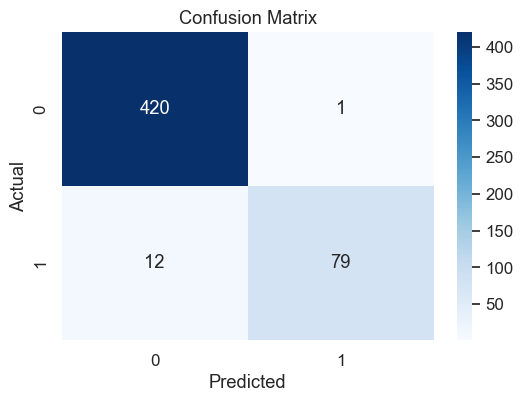

In [49]:
X_train_mlp, X_test_mlp, y_train_mlp, y_test_mlp = train_test_split(
    X, y, test_size=0.2, random_state=369, stratify=y
)

float_features = ['Age',
                    'Academic Pressure',
                    'Work Pressure',
                    'CGPA',
                    'Study Satisfaction',
                    'Job Satisfaction',
                    'Sleep Duration',
                    'Dietary Habits',
                    'Degree',
                    'WS hours',
                    'Financial Stress']

sc = MinMaxScaler()

X_train[float_features] = sc.fit_transform(X_train[float_features])
X_test[float_features] = sc.transform(X_test[float_features])

mlp = MLPClassifier(
    max_iter = 300, 
    early_stopping = True, 
    random_state = 369
    )

param_grid_mlp = {
    'hidden_layer_sizes': [(32,), (32, 16), (64,), (64, 32), (100, 50), (50, 25)],
    'activation': ['relu'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.5, 1],
    'learning_rate': ['constant', 'adaptive'],
    'learning_rate_init': [0.001],
    'tol': [1e-4, 1e-3]
}

grid_search_mlp = GridSearchCV(
    estimator = mlp,
    param_grid = param_grid_mlp,
    cv = 5,
    scoring = 'accuracy',
    n_jobs = -1,
    verbose = 1
)

grid_search_mlp.fit(X_train, y_train)

print("Best Parameters:", grid_search_mlp.best_params_)
print("Best CV Accuracy:", grid_search_mlp.best_score_)

y_pred = grid_search_mlp.predict(X_test)

print("Accuracy on Test Data:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

train_acc_mlp = grid_search_mlp.score(X_train, y_train)
test_acc_mlp = grid_search_mlp.score(X_test, y_test)

print("Train Accuracy:", train_acc_mlp)
print("Test Accuracy:", test_acc_mlp)

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (6, 4))
sns.heatmap(cm, annot = True, fmt = "d", cmap = "Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

## SVM

Fitting 10 folds for each of 12 candidates, totalling 120 fits
Best Parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}
Best CV Accuracy: 0.9637924438067909
Accuracy on Test Data: 0.962890625
              precision    recall  f1-score   support

         0.0       0.98      0.97      0.98       421
         1.0       0.88      0.91      0.90        91

    accuracy                           0.96       512
   macro avg       0.93      0.94      0.94       512
weighted avg       0.96      0.96      0.96       512

Train Accuracy: 0.9735812133072407
Test Accuracy: 0.962890625


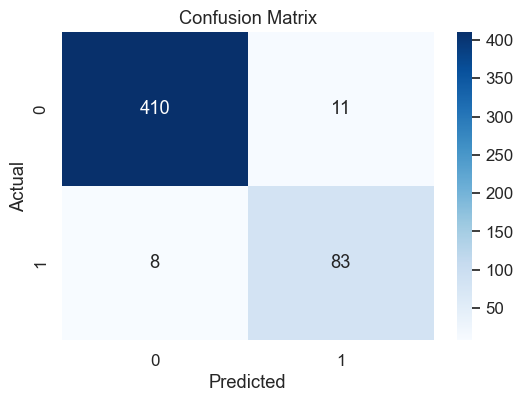

In [50]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.20, random_state = 369, stratify = y)

float_features = ['Age',
                    'Academic Pressure',
                    'Work Pressure',
                    'CGPA',
                    'Study Satisfaction',
                    'Job Satisfaction',
                    'Sleep Duration',
                    'Dietary Habits',
                    'Degree',
                    'WS hours',
                    'Financial Stress']

sc = MinMaxScaler()

X_train[float_features] = sc.fit_transform(X_train[float_features])
X_test[float_features] = sc.transform(X_test[float_features])

svm = SVC(probability = True, random_state = 369, class_weight = 'balanced')

param_grid_svm = {
    'kernel': ['linear', 'rbf'],
    'C': [5, 10],
    'gamma': ['scale', 0.01, 0.1]                
}

grid_search_svm = GridSearchCV(
    estimator = svm,
    param_grid = param_grid_svm,
    cv = 10,
    scoring = 'accuracy',
    n_jobs = -1,
    verbose = 1
)

grid_search_svm.fit(X_train, y_train)

print("Best Parameters:", grid_search_svm.best_params_)
print("Best CV Accuracy:", grid_search_svm.best_score_)

y_pred = grid_search_svm.predict(X_test)
print("Accuracy on Test Data:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

train_acc_svm = grid_search_svm.score(X_train, y_train)
test_acc_svm = grid_search_svm.score(X_test, y_test)

print("Train Accuracy:", train_acc_svm)
print("Test Accuracy:", test_acc_svm)

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (6, 4))
sns.heatmap(cm, annot = True, fmt = "d", cmap = "Blues")

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

## Logistic Regression

Fitting 5 folds for each of 2 candidates, totalling 10 fits
Best Parameters: {'C': 500, 'l1_ratio': 1.0, 'penalty': 'elasticnet', 'solver': 'saga'}
Best CV Accuracy: 0.9681345163763829
Accuracy on Test Data: 0.9713168187744459
              precision    recall  f1-score   support

         0.0       0.99      0.98      0.98       630
         1.0       0.91      0.93      0.92       137

    accuracy                           0.97       767
   macro avg       0.95      0.96      0.95       767
weighted avg       0.97      0.97      0.97       767

Train Accuracy: 0.9815539407490218
Test Accuracy: 0.9713168187744459


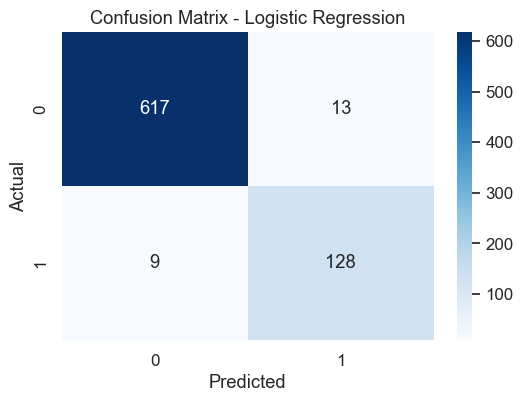

In [51]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.3, random_state = 369, stratify = y
)

float_features = ['Age',
                    'Academic Pressure',
                    'Work Pressure',
                    'CGPA',
                    'Study Satisfaction',
                    'Job Satisfaction',
                    'Sleep Duration',
                    'Dietary Habits',
                    'Degree',
                    'WS hours',
                    'Financial Stress']

sc = MinMaxScaler()

X_train[float_features] = sc.fit_transform(X_train[float_features])
X_test[float_features] = sc.transform(X_test[float_features])

logreg = LogisticRegression(max_iter = 500, random_state = 369, class_weight = 'balanced')

param_grid = {
    'C': [500, 100],
    'penalty': ['elasticnet'],
    'solver': ['saga'],
    'l1_ratio': [1.0]
}

grid_logreg = GridSearchCV(
    estimator = logreg,
    param_grid = param_grid,
    cv = 5,
    scoring = 'accuracy',
    n_jobs = -1,
    verbose = 1
)

grid_logreg.fit(X_train, y_train)

print("Best Parameters:", grid_logreg.best_params_)
print("Best CV Accuracy:", grid_logreg.best_score_)

y_pred = grid_logreg.predict(X_test)

print("Accuracy on Test Data:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

train_acc_lr = grid_logreg.score(X_train, y_train)
test_acc_lr = grid_logreg.score(X_test, y_test)

print("Train Accuracy:", train_acc_lr)
print("Test Accuracy:", test_acc_lr)

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (6, 4))
sns.heatmap(cm, annot = True, fmt = "d", cmap = "Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

## XGBoost

scale_pos_weight: 4.62

Accuracy on Test Data: 0.96484375

Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      0.97      0.98       421
         1.0       0.87      0.95      0.91        91

    accuracy                           0.96       512
   macro avg       0.93      0.96      0.94       512
weighted avg       0.97      0.96      0.97       512

Train Accuracy: 0.9853
Test Accuracy: 0.9648


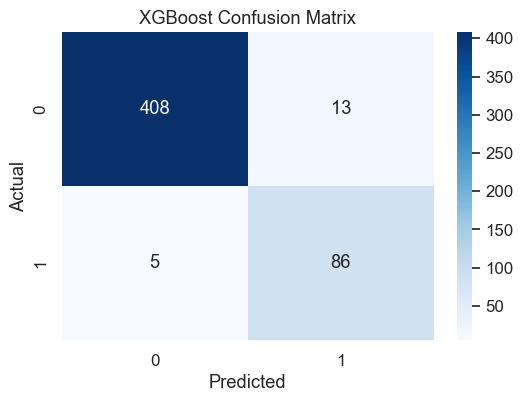

In [52]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from xgboost import XGBClassifier
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

X = df.drop("Depression", axis=1)
y = df["Depression"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.2, random_state = 369, stratify = y
)

float_features = [
    'Age', 'Academic Pressure', 'Work Pressure', 'CGPA',
    'Study Satisfaction', 'Job Satisfaction', 'Sleep Duration',
    'Dietary Habits', 'Degree', 'WS hours', 'Financial Stress'
]

sc = MinMaxScaler()
X_train[float_features] = sc.fit_transform(X_train[float_features])
X_test[float_features] = sc.transform(X_test[float_features])

scale_pos_weight = len(y_train[y_train == 0]) / len(y_train[y_train == 1])
print(f"scale_pos_weight: {scale_pos_weight:.2f}")

xgb_model = XGBClassifier(
    tree_method = 'gpu_hist',
    predictor = 'gpu_predictor',
    n_jobs = 1,
    objective = 'binary:logistic',
    eval_metric = 'logloss',
    random_state = 369,
    scale_pos_weight = scale_pos_weight,  
    reg_lambda = 1.0,                     
    reg_alpha = 0.2,                      
    max_depth = 3,                       
    min_child_weight = 7,
    subsample = 0.8,
    colsample_bytree = 0.8,
    learning_rate = 0.05,
    n_estimators = 500
)

xgb_model.fit(
    X_train, y_train,
    eval_set = [(X_test, y_test)],
    verbose = False
)

y_pred = xgb_model.predict(X_test)

print("\nAccuracy on Test Data:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

train_acc_xgb = xgb_model.score(X_train, y_train)
test_acc_xgb = xgb_model.score(X_test, y_test)

print(f"Train Accuracy: {train_acc_xgb:.4f}")
print(f"Test Accuracy: {test_acc_xgb:.4f}")

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (6, 4))
sns.heatmap(cm, annot = True, fmt = 'd', cmap = 'Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("XGBoost Confusion Matrix")
plt.show()

# Final Result

                 Model  Train Accuracy  Test Accuracy  Best CV Accuracy
0        Random Forest          0.9736         0.9258            0.9565
1                  KNN          0.9002         0.8926            0.8968
2                  MLP          0.9834         0.9746            0.9648
3                  SVM          0.9736         0.9629            0.9638
4  Logistic Regression          0.9816         0.9713            0.9681
5              XGBoost          0.9853         0.9648               NaN


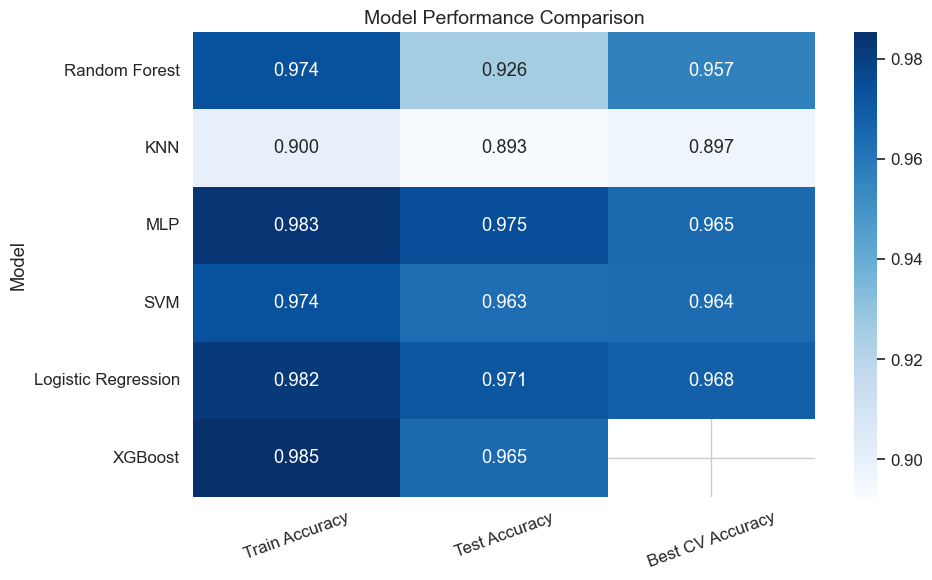

In [53]:
results = []

results.append({
    'Model': 'Random Forest',
    'Train Accuracy': train_acc_rf,
    'Test Accuracy': test_acc_rf,
    'Best CV Accuracy': grid_search_rf.best_score_
})

results.append({
    'Model': 'KNN',
    'Train Accuracy': train_acc_knn,
    'Test Accuracy': test_acc_knn,
    'Best CV Accuracy': grid_search_knn.best_score_
})

results.append({
    'Model': 'MLP',
    'Train Accuracy': train_acc_mlp,
    'Test Accuracy': test_acc_mlp,
    'Best CV Accuracy': grid_search_mlp.best_score_
})

results.append({
    'Model': 'SVM',
    'Train Accuracy': train_acc_svm,
    'Test Accuracy': test_acc_svm,
    'Best CV Accuracy': grid_search_svm.best_score_
})

results.append({
    'Model': 'Logistic Regression',
    'Train Accuracy': train_acc_lr,
    'Test Accuracy': test_acc_lr,
    'Best CV Accuracy': grid_logreg.best_score_
})

results.append({
    'Model': 'XGBoost',
    'Train Accuracy': train_acc_xgb,
    'Test Accuracy': test_acc_xgb,
    'Best CV Accuracy': None
})


results_df = pd.DataFrame(results)


pd.options.display.float_format = '{:.4f}'.format
print(results_df)

pd.options.display.float_format = '{:.4f}'.format

plt.figure(figsize = (10, 6))
sns.heatmap(results_df.set_index('Model'), annot = True, fmt = ".3f", cmap = "Blues")

plt.title("Model Performance Comparison", fontsize = 14)
plt.xticks(rotation = 20)
plt.yticks(rotation = 0)
plt.tight_layout()
plt.show()